Loading mouse disorder data...
Total phosphorylation sites: 30442

Phosphorylation sites in disordered regions: 19517
Phosphorylation sites in ordered regions: 9967
Phosphorylation sites with no disorder data: 958

Percentages (excluding no data):
Disordered regions: 66.2%
Ordered regions: 33.8%


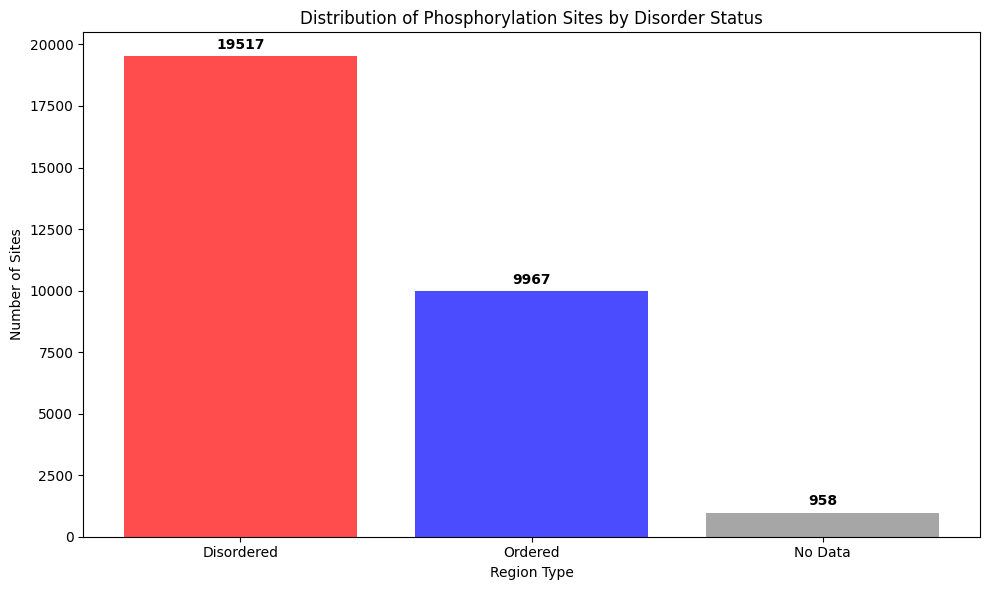

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mouse disorder data
print("Loading mouse disorder data...")
df_mouse = pd.read_csv('../data/processed/mouse/full_disorder.csv')

print(f"Total phosphorylation sites: {len(df_mouse)}")

# Count phosphorylations by disorder status
disordered_count = len(df_mouse[df_mouse['disordered?'] == 1])
ordered_count = len(df_mouse[df_mouse['disordered?'] == 0])
no_data_count = len(df_mouse[df_mouse['disordered?'].isna()])

print(f"\nPhosphorylation sites in disordered regions: {disordered_count}")
print(f"Phosphorylation sites in ordered regions: {ordered_count}")
print(f"Phosphorylation sites with no disorder data: {no_data_count}")

# Calculate percentages
total_with_data = disordered_count + ordered_count
if total_with_data > 0:
    disordered_pct = (disordered_count / total_with_data) * 100
    ordered_pct = (ordered_count / total_with_data) * 100
    
    print(f"\nPercentages (excluding no data):")
    print(f"Disordered regions: {disordered_pct:.1f}%")
    print(f"Ordered regions: {ordered_pct:.1f}%")

# Create a simple bar chart
plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
counts = [disordered_count, ordered_count, no_data_count]
colors = ['red', 'blue', 'gray']

bars = plt.bar(categories, counts, color=colors, alpha=0.7)
plt.title('Distribution of Phosphorylation Sites by Disorder Status')
plt.ylabel('Number of Sites')
plt.xlabel('Region Type')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Loading rat disorder data...
Total phosphorylation sites: 23004

Phosphorylation sites in disordered regions: 13897
Phosphorylation sites in ordered regions: 7136
Phosphorylation sites with no disorder data: 1971

Percentages (excluding no data):
Disordered regions: 66.1%
Ordered regions: 33.9%


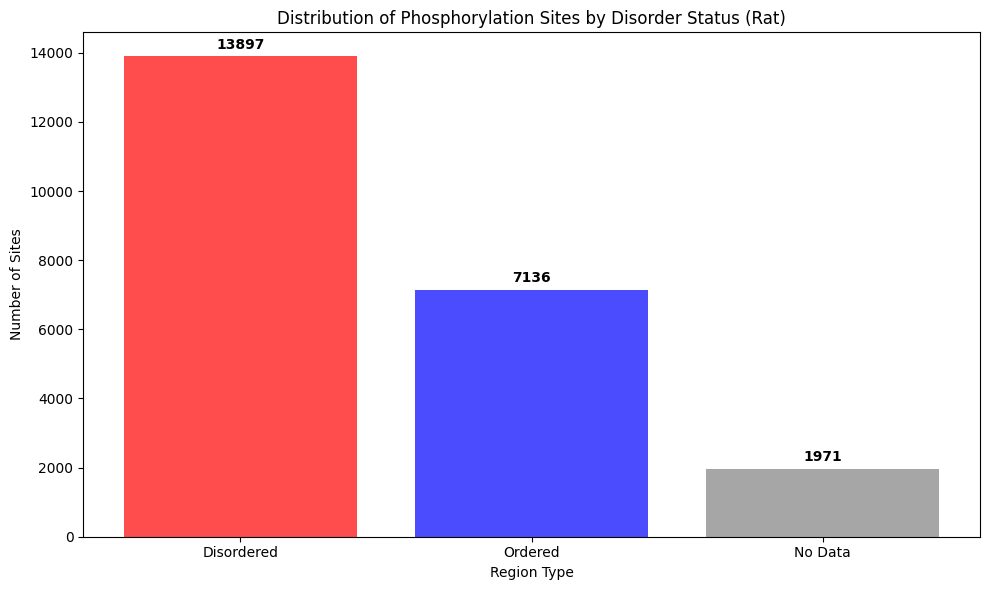

In [5]:
# Load the rat disorder data
print("Loading rat disorder data...")
df_rat = pd.read_csv('../data/processed/rat/full_disorder.csv')

print(f"Total phosphorylation sites: {len(df_rat)}")

# Count phosphorylations by disorder status
disordered_count_rat = len(df_rat[df_rat['disordered?'] == 1])
ordered_count_rat = len(df_rat[df_rat['disordered?'] == 0])
no_data_count_rat = len(df_rat[df_rat['disordered?'].isna()])

print(f"\nPhosphorylation sites in disordered regions: {disordered_count_rat}")
print(f"Phosphorylation sites in ordered regions: {ordered_count_rat}")
print(f"Phosphorylation sites with no disorder data: {no_data_count_rat}")

# Calculate percentages
total_with_data_rat = disordered_count_rat + ordered_count_rat
if total_with_data_rat > 0:
    disordered_pct_rat = (disordered_count_rat / total_with_data_rat) * 100
    ordered_pct_rat = (ordered_count_rat / total_with_data_rat) * 100
    
    print(f"\nPercentages (excluding no data):")
    print(f"Disordered regions: {disordered_pct_rat:.1f}%")
    print(f"Ordered regions: {ordered_pct_rat:.1f}%")

# Create a simple bar chart for rat data
plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
counts = [disordered_count_rat, ordered_count_rat, no_data_count_rat]
colors = ['red', 'blue', 'gray']

bars = plt.bar(categories, counts, color=colors, alpha=0.7)
plt.title('Distribution of Phosphorylation Sites by Disorder Status (Rat)')
plt.ylabel('Number of Sites')
plt.xlabel('Region Type')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 PUNCH2 files
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898
Total S/T/Y residues: 806033

Percentages of all S/T/Y residues:
Disordered regions: 32.8%
Ordered regions: 67.2%


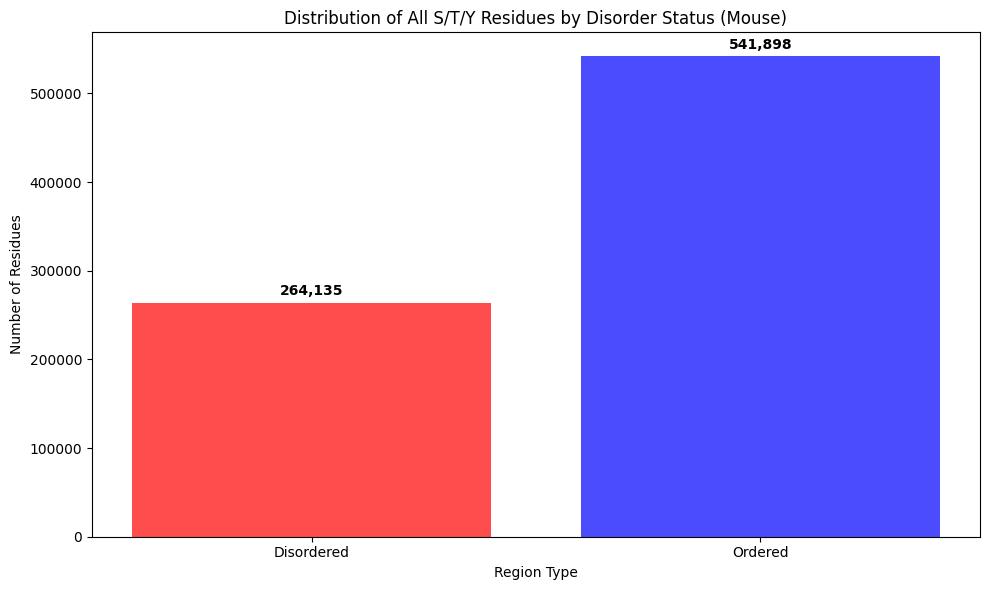

In [ ]:
#Cell 3

import os
import glob

# Count all S, T, Y residues from PUNCH2 results for mouse
print("Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...")

punch2_dir = "../outputs/punch2/Punch2_results_mouse"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Count all S/T/Y residues by disorder status
    total_sty_disordered = 0
    total_sty_ordered = 0
    total_sty_residues = 0
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Check if it's S, T, or Y
                    if amino_acid in ['S', 'T', 'Y']:
                        total_sty_residues += 1
                        
                        # Check disorder status (1 = disordered, 0 = ordered)
                        if disorder_prediction == '1':
                            total_sty_disordered += 1
                        elif disorder_prediction == '0':
                            total_sty_ordered += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered}")
    print(f"Total S/T/Y residues: {total_sty_residues}")
    
    # Calculate percentages
    if total_sty_residues > 0:
        disordered_pct = (total_sty_disordered / total_sty_residues) * 100
        ordered_pct = (total_sty_ordered / total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {disordered_pct:.1f}%")
        print(f"Ordered regions: {ordered_pct:.1f}%")
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    categories = ['Disordered', 'Ordered']
    counts = [total_sty_disordered, total_sty_ordered]
    colors = ['red', 'blue']
    
    bars = plt.bar(categories, counts, color=colors, alpha=0.7)
    plt.title('Distribution of All S/T/Y Residues by Disorder Status (Mouse)')
    plt.ylabel('Number of Residues')
    plt.xlabel('Region Type')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Analyzing all S, T, Y residues from PUNCH2 results (Rat)...
Found 5772 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...

Processed 5772 PUNCH2 files
Total S/T/Y residues in disordered regions: 246567
Total S/T/Y residues in ordered regions: 519128
Total S/T/Y residues: 765695

Percentages of all S/T/Y residues:
Disordered regions: 32.2%
Ordered regions: 67.8%


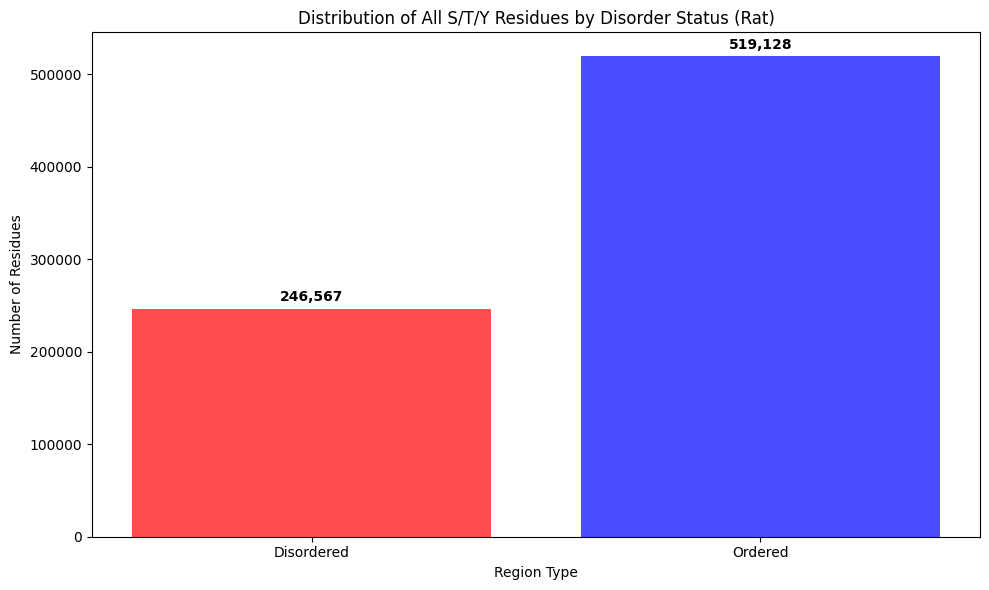

In [ ]:
#Cell
# Count all S, T, Y residues from PUNCH2 results for rat
print("Analyzing all S, T, Y residues from PUNCH2 results (Rat)...")

punch2_dir = "../outputs/punch2/Punch2_results_rat"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Count all S/T/Y residues by disorder status
    total_sty_disordered_rat = 0
    total_sty_ordered_rat = 0
    total_sty_residues_rat = 0
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Check if it's S, T, or Y
                    if amino_acid in ['S', 'T', 'Y']:
                        total_sty_residues_rat += 1
                        
                        # Check disorder status (1 = disordered, 0 = ordered)
                        if disorder_prediction == '1':
                            total_sty_disordered_rat += 1
                        elif disorder_prediction == '0':
                            total_sty_ordered_rat += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered_rat}")
    print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered_rat}")
    print(f"Total S/T/Y residues: {total_sty_residues_rat}")
    
    # Calculate percentages
    if total_sty_residues_rat > 0:
        disordered_pct_rat = (total_sty_disordered_rat / total_sty_residues_rat) * 100
        ordered_pct_rat = (total_sty_ordered_rat / total_sty_residues_rat) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {disordered_pct_rat:.1f}%")
        print(f"Ordered regions: {ordered_pct_rat:.1f}%")
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    categories = ['Disordered', 'Ordered']
    counts = [total_sty_disordered_rat, total_sty_ordered_rat]
    colors = ['red', 'blue']
    
    bars = plt.bar(categories, counts, color=colors, alpha=0.7)
    plt.title('Distribution of All S/T/Y Residues by Disorder Status (Rat)')
    plt.ylabel('Number of Residues')
    plt.xlabel('Region Type')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Calculating phosphorylation enrichment for mouse data...
Using values from previous cells:
Phosphorylated sites in disordered regions: 19517
Phosphorylated sites in ordered regions: 9967
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898

Calculating phosphorylation enrichment...
Percentage of phosphorylated residues in disordered regions: 7.389%
  (19517 phosphorylated out of 264135 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.839%
  (9967 phosphorylated out of 541898 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.02x
→ Phosphorylation is 4.02x more enriched in disordered regions

Creating visualization...


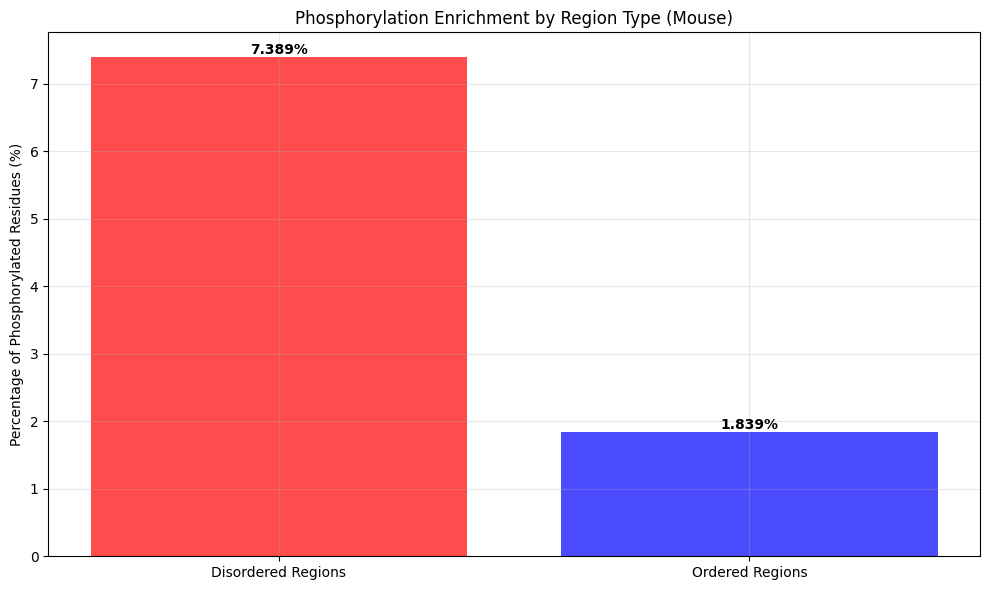


SUMMARY:
Phosphorylation enrichment in disordered regions: 7.389%
Phosphorylation enrichment in ordered regions: 1.839%
Enrichment ratio: 4.02x


In [ ]:
#Cell 5
import numpy as np

# Calculate phosphorylation enrichment for mouse data using values from previous cells
print("Calculating phosphorylation enrichment for mouse data...")
print("=" * 60)

# Use values from previous cells (assuming they were run)
# From cell 1: disordered_count, ordered_count
# From cell 3: total_sty_disordered, total_sty_ordered

print(f"Using values from previous cells:")
print(f"Phosphorylated sites in disordered regions: {disordered_count}")
print(f"Phosphorylated sites in ordered regions: {ordered_count}")
print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered}")
print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered}")

# Calculate enrichment percentages
print("\nCalculating phosphorylation enrichment...")

# Percentage of phosphorylated residues in disordered regions
if total_sty_disordered > 0:
    phospho_in_disordered_pct = (disordered_count / total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {phospho_in_disordered_pct:.3f}%")
    print(f"  ({disordered_count} phosphorylated out of {total_sty_disordered} total S/T/Y residues)")
else:
    phospho_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if total_sty_ordered > 0:
    phospho_in_ordered_pct = (ordered_count / total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {phospho_in_ordered_pct:.3f}%")
    print(f"  ({ordered_count} phosphorylated out of {total_sty_ordered} total S/T/Y residues)")
else:
    phospho_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if phospho_in_ordered_pct > 0:
    enrichment_ratio = phospho_in_disordered_pct / phospho_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {enrichment_ratio:.2f}x")
    if enrichment_ratio > 1:
        print(f"→ Phosphorylation is {enrichment_ratio:.2f}x more enriched in disordered regions")
    elif enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Create visualization
print("\nCreating visualization...")
plt.figure(figsize=(10, 6))

# Comparison of phosphorylation percentages
categories = ['Disordered Regions', 'Ordered Regions']
phospho_percentages = [phospho_in_disordered_pct, phospho_in_ordered_pct]

bars = plt.bar(categories, phospho_percentages, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Percentage of Phosphorylated Residues (%)')
plt.title('Phosphorylation Enrichment by Region Type (Mouse)')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars, phospho_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"Phosphorylation enrichment in disordered regions: {phospho_in_disordered_pct:.3f}%")
print(f"Phosphorylation enrichment in ordered regions: {phospho_in_ordered_pct:.3f}%")
print(f"Enrichment ratio: {enrichment_ratio:.2f}x")


Calculating phosphorylation enrichment for rat data...
Using values from previous cells:
Phosphorylated sites in disordered regions: 13897
Phosphorylated sites in ordered regions: 7136
Total S/T/Y residues in disordered regions: 246567
Total S/T/Y residues in ordered regions: 519128

Calculating phosphorylation enrichment...
Percentage of phosphorylated residues in disordered regions: 5.636%
  (13897 phosphorylated out of 246567 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.375%
  (7136 phosphorylated out of 519128 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.10x
→ Phosphorylation is 4.10x more enriched in disordered regions

Creating visualization...


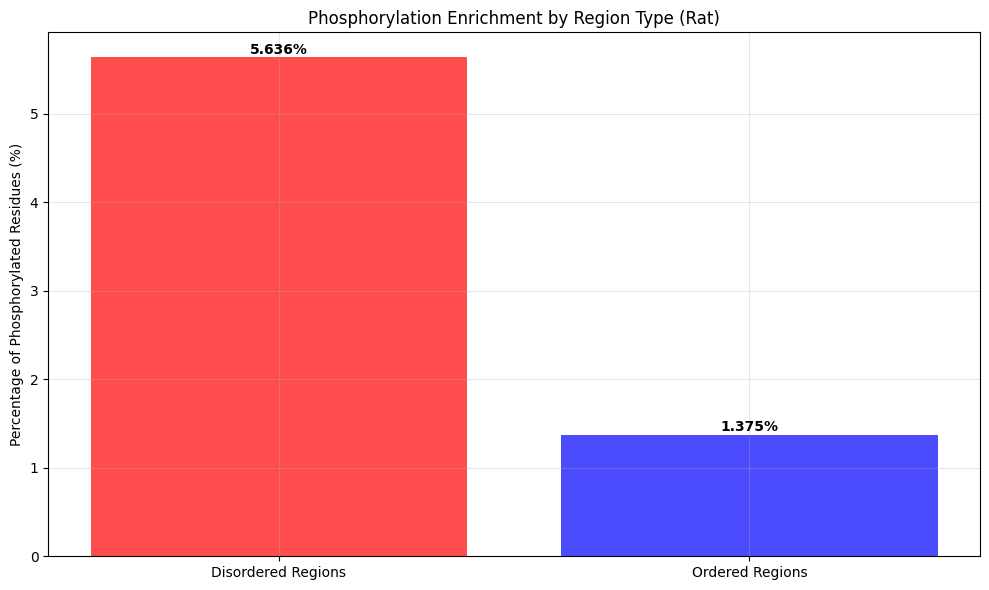


SUMMARY:
Phosphorylation enrichment in disordered regions: 5.636%
Phosphorylation enrichment in ordered regions: 1.375%
Enrichment ratio: 4.10x


In [ ]:
# Cell 6
# Calculate phosphorylation enrichment for rat data using values from previous cells
print("Calculating phosphorylation enrichment for rat data...")
print("=" * 60)

# Use values from previous cells (assuming they were run)
# From cell 2: disordered_count_rat, ordered_count_rat
# From cell 4: total_sty_disordered_rat, total_sty_ordered_rat

print(f"Using values from previous cells:")
print(f"Phosphorylated sites in disordered regions: {disordered_count_rat}")
print(f"Phosphorylated sites in ordered regions: {ordered_count_rat}")
print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered_rat}")
print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered_rat}")

# Calculate enrichment percentages
print("\nCalculating phosphorylation enrichment...")

# Percentage of phosphorylated residues in disordered regions
if total_sty_disordered_rat > 0:
    phospho_in_disordered_pct_rat = (disordered_count_rat / total_sty_disordered_rat) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {phospho_in_disordered_pct_rat:.3f}%")
    print(f"  ({disordered_count_rat} phosphorylated out of {total_sty_disordered_rat} total S/T/Y residues)")
else:
    phospho_in_disordered_pct_rat = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if total_sty_ordered_rat > 0:
    phospho_in_ordered_pct_rat = (ordered_count_rat / total_sty_ordered_rat) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {phospho_in_ordered_pct_rat:.3f}%")
    print(f"  ({ordered_count_rat} phosphorylated out of {total_sty_ordered_rat} total S/T/Y residues)")
else:
    phospho_in_ordered_pct_rat = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if phospho_in_ordered_pct_rat > 0:
    enrichment_ratio_rat = phospho_in_disordered_pct_rat / phospho_in_ordered_pct_rat
    print(f"\nEnrichment ratio (disordered/ordered): {enrichment_ratio_rat:.2f}x")
    if enrichment_ratio_rat > 1:
        print(f"→ Phosphorylation is {enrichment_ratio_rat:.2f}x more enriched in disordered regions")
    elif enrichment_ratio_rat < 1:
        print(f"→ Phosphorylation is {1/enrichment_ratio_rat:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Create visualization
print("\nCreating visualization...")
plt.figure(figsize=(10, 6))

# Comparison of phosphorylation percentages
categories = ['Disordered Regions', 'Ordered Regions']
phospho_percentages = [phospho_in_disordered_pct_rat, phospho_in_ordered_pct_rat]

bars = plt.bar(categories, phospho_percentages, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Percentage of Phosphorylated Residues (%)')
plt.title('Phosphorylation Enrichment by Region Type (Rat)')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars, phospho_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"Phosphorylation enrichment in disordered regions: {phospho_in_disordered_pct_rat:.3f}%")
print(f"Phosphorylation enrichment in ordered regions: {phospho_in_ordered_pct_rat:.3f}%")
print(f"Enrichment ratio: {enrichment_ratio_rat:.2f}x")


Analyzing S, T, Y residues individually from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 PUNCH2 files

INDIVIDUAL AMINO ACID COUNTS BY DISORDER STATUS

SERINE (S):
  Total S residues: 435,125
  S in disordered regions: 178,525 (41.0%)
  S in ordered regions: 256,600 (59.0%)

THREONINE (T):
  Total T residues: 255,792
  T in disordered regions: 72,638 (28.4%)
  T in ordered regions: 183,154 (71.6%)

TYROSINE (Y):
  Total Y residues: 115,116
  Y in disordered regions: 12,972 (11.3%)
  Y in ordered regions: 102,144 (88.7%)

SUMMARY:
  Total S/T/Y residues: 806,033
  Total in disordered regions: 264,135
  Total in ordered regions: 541,898

DETAILED BREAKDOWN WITH PERCENTAGES

SERINE (S) - Total: 435,125
  Disordered: 178,525 (41.0%)
  Ordered: 256,600 (59.0%)

THREONINE (T) - Total: 255,792
  Disordered: 72,638 (28.4%)


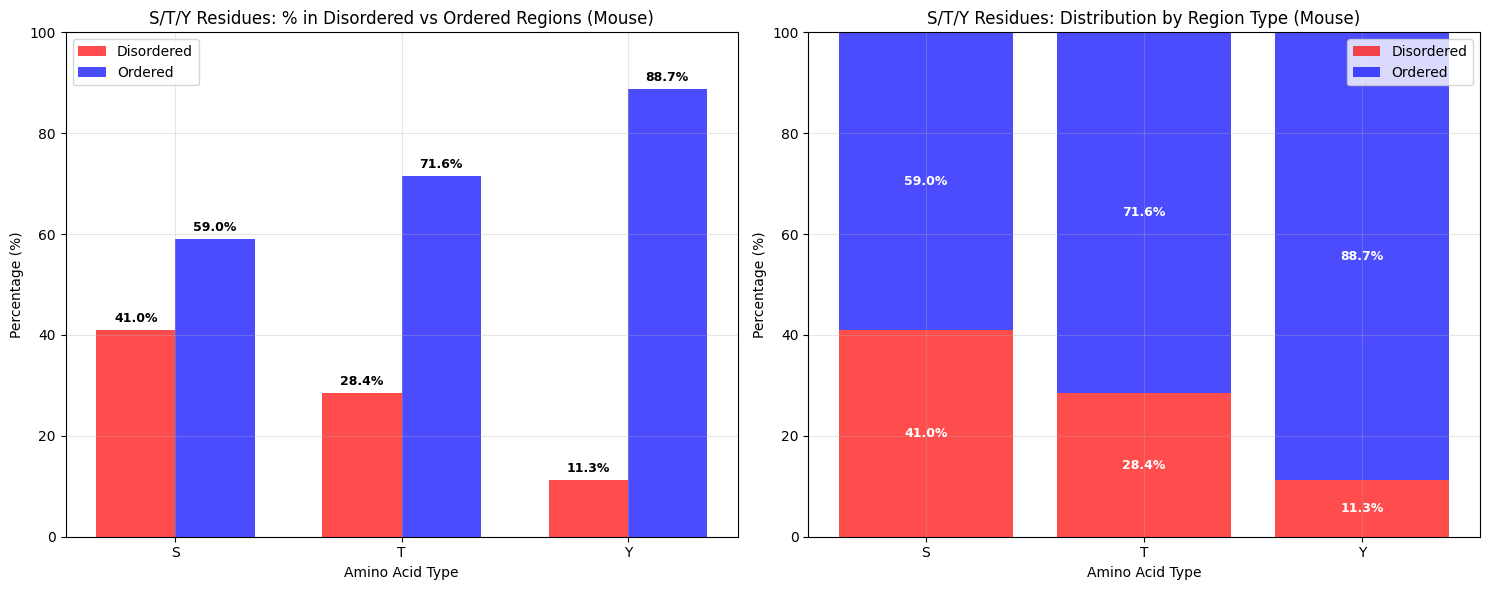

In [ ]:
# Cell 7
# Count S, T, Y residues individually in ordered/disordered regions for mouse data
print("Analyzing S, T, Y residues individually from PUNCH2 results (Mouse)...")
print("=" * 70)

punch2_dir = "../outputs/punch2/Punch2_results_mouse"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Initialize counters for each amino acid type
    # Disordered regions
    s_disordered = 0
    t_disordered = 0
    y_disordered = 0
    
    # Ordered regions
    s_ordered = 0
    t_ordered = 0
    y_ordered = 0
    
    # Totals
    s_total = 0
    t_total = 0
    y_total = 0
    
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        s_total += 1
                        if disorder_prediction == '1':
                            s_disordered += 1
                        elif disorder_prediction == '0':
                            s_ordered += 1
                    elif amino_acid == 'T':
                        t_total += 1
                        if disorder_prediction == '1':
                            t_disordered += 1
                        elif disorder_prediction == '0':
                            t_ordered += 1
                    elif amino_acid == 'Y':
                        y_total += 1
                        if disorder_prediction == '1':
                            y_disordered += 1
                        elif disorder_prediction == '0':
                            y_ordered += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print("\n" + "="*70)
    print("INDIVIDUAL AMINO ACID COUNTS BY DISORDER STATUS")
    print("="*70)
    
    # Serine (S) counts
    print(f"\nSERINE (S):")
    print(f"  Total S residues: {s_total:,}")
    print(f"  S in disordered regions: {s_disordered:,} ({s_disordered/s_total*100:.1f}%)")
    print(f"  S in ordered regions: {s_ordered:,} ({s_ordered/s_total*100:.1f}%)")
    
    # Threonine (T) counts
    print(f"\nTHREONINE (T):")
    print(f"  Total T residues: {t_total:,}")
    print(f"  T in disordered regions: {t_disordered:,} ({t_disordered/t_total*100:.1f}%)")
    print(f"  T in ordered regions: {t_ordered:,} ({t_ordered/t_total*100:.1f}%)")
    
    # Tyrosine (Y) counts
    print(f"\nTYROSINE (Y):")
    print(f"  Total Y residues: {y_total:,}")
    print(f"  Y in disordered regions: {y_disordered:,} ({y_disordered/y_total*100:.1f}%)")
    print(f"  Y in ordered regions: {y_ordered:,} ({y_ordered/y_total*100:.1f}%)")
    
    # Summary
    print(f"\nSUMMARY:")
    print(f"  Total S/T/Y residues: {s_total + t_total + y_total:,}")
    print(f"  Total in disordered regions: {s_disordered + t_disordered + y_disordered:,}")
    print(f"  Total in ordered regions: {s_ordered + t_ordered + y_ordered:,}")
    
    # Calculate percentages for each amino acid
    s_disordered_pct = s_disordered/s_total*100 if s_total > 0 else 0
    s_ordered_pct = s_ordered/s_total*100 if s_total > 0 else 0
    
    t_disordered_pct = t_disordered/t_total*100 if t_total > 0 else 0
    t_ordered_pct = t_ordered/t_total*100 if t_total > 0 else 0
    
    y_disordered_pct = y_disordered/y_total*100 if y_total > 0 else 0
    y_ordered_pct = y_ordered/y_total*100 if y_total > 0 else 0
    
    # Show detailed breakdown
    print(f"\n" + "="*70)
    print("DETAILED BREAKDOWN WITH PERCENTAGES")
    print("="*70)
    
    print(f"\nSERINE (S) - Total: {s_total:,}")
    print(f"  Disordered: {s_disordered:,} ({s_disordered_pct:.1f}%)")
    print(f"  Ordered: {s_ordered:,} ({s_ordered_pct:.1f}%)")
    
    print(f"\nTHREONINE (T) - Total: {t_total:,}")
    print(f"  Disordered: {t_disordered:,} ({t_disordered_pct:.1f}%)")
    print(f"  Ordered: {t_ordered:,} ({t_ordered_pct:.1f}%)")
    
    print(f"\nTYROSINE (Y) - Total: {y_total:,}")
    print(f"  Disordered: {y_disordered:,} ({y_disordered_pct:.1f}%)")
    print(f"  Ordered: {y_ordered:,} ({y_ordered_pct:.1f}%)")
    
    # Show comparison between amino acids
    print(f"\n" + "="*70)
    print("COMPARISON: DISORDERED REGION PREFERENCES")
    print("="*70)
    print(f"S: {s_disordered_pct:.1f}% in disordered regions")
    print(f"T: {t_disordered_pct:.1f}% in disordered regions") 
    print(f"Y: {y_disordered_pct:.1f}% in disordered regions")
    
    # Identify which amino acid is most disordered
    max_disordered = max(s_disordered_pct, t_disordered_pct, y_disordered_pct)
    if max_disordered == s_disordered_pct:
        most_disordered = "S (Serine)"
    elif max_disordered == t_disordered_pct:
        most_disordered = "T (Threonine)"
    else:
        most_disordered = "Y (Tyrosine)"
    
    print(f"\n→ {most_disordered} shows the highest preference for disordered regions ({max_disordered:.1f}%)")
    
    # Create visualization showing percentages
    print(f"\nCreating visualization...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Percentages in disordered regions
    amino_acids = ['S', 'T', 'Y']
    disordered_pcts = [s_disordered_pct, t_disordered_pct, y_disordered_pct]
    ordered_pcts = [s_ordered_pct, t_ordered_pct, y_ordered_pct]
    
    x = np.arange(len(amino_acids))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, disordered_pcts, width, label='Disordered', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, ordered_pcts, width, label='Ordered', color='blue', alpha=0.7)
    
    ax1.set_xlabel('Amino Acid Type')
    ax1.set_ylabel('Percentage (%)')
    ax1.set_title('S/T/Y Residues: % in Disordered vs Ordered Regions (Mouse)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(amino_acids)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels
    for bar, pct in zip(bars1, disordered_pcts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for bar, pct in zip(bars2, ordered_pcts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Plot 2: Stacked bar chart showing the distribution
    ax2.bar(amino_acids, disordered_pcts, label='Disordered', color='red', alpha=0.7)
    ax2.bar(amino_acids, ordered_pcts, bottom=disordered_pcts, label='Ordered', color='blue', alpha=0.7)
    
    ax2.set_xlabel('Amino Acid Type')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('S/T/Y Residues: Distribution by Region Type (Mouse)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    # Add value labels for stacked bars
    for i, (dis_pct, ord_pct) in enumerate(zip(disordered_pcts, ordered_pcts)):
        # Label for disordered portion
        ax2.text(i, dis_pct/2, f'{dis_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
        # Label for ordered portion
        ax2.text(i, dis_pct + ord_pct/2, f'{ord_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
    
    plt.tight_layout()
    plt.show()


ANALYZING S, T, Y RESIDUES INDIVIDUALLY FROM PUNCH2 RESULTS (RAT)
Found 5772 PUNCH2 result files
Processing file 1/5772
Processing file 1001/5772
Processing file 2001/5772
Processing file 3001/5772
Processing file 4001/5772
Processing file 5001/5772
Completed processing 5772 files

RESULTS FOR RAT DATA:

SERINE (S):
  Total S residues: 411,410
  S in disordered regions: 166,104 (40.4%)
  S in ordered regions: 245,306 (59.6%)

THREONINE (T):
  Total T residues: 244,345
  T in disordered regions: 68,317 (28.0%)
  T in ordered regions: 176,028 (72.0%)

TYROSINE (Y):
  Total Y residues: 109,940
  Y in disordered regions: 12,146 (11.0%)
  Y in ordered regions: 97,794 (89.0%)

Creating visualization...


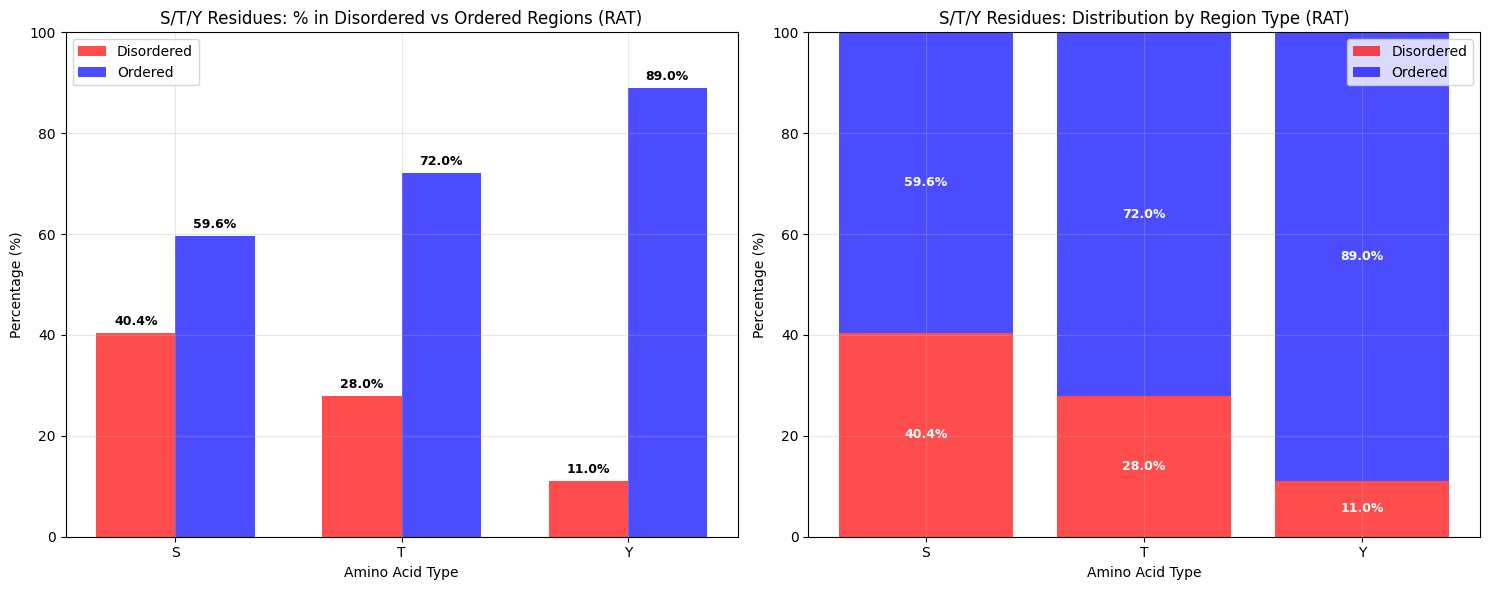


KEY INSIGHTS (RAT DATA):
• In disordered regions: S is most abundant (40.4%), Y is least (11.0%)
• In ordered regions: Y is most abundant (89.0%), S is least (59.6%)
• S shows 0.7x higher representation in disordered vs ordered regions
• T shows 0.4x higher representation in disordered vs ordered regions
• Y shows 0.1x higher representation in disordered vs ordered regions


In [ ]:
# Cell 8
# Analyzing S, T, Y residues individually from PUNCH2 results (RAT)
# Count total S, T, Y residues in ordered and disordered regions from PUNCH2 files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

print("=" * 80)
print("ANALYZING S, T, Y RESIDUES INDIVIDUALLY FROM PUNCH2 RESULTS (RAT)")
print("=" * 80)

# Path to PUNCH2 results directory for rat
punch2_dir = '../outputs/punch2/Punch2_results_rat'

if not os.path.exists(punch2_dir):
    print(f"Error: PUNCH2 directory not found: {punch2_dir}")
    print("Please ensure the PUNCH2 results are available.")
else:
    # Initialize counters
    s_disordered_rat = 0
    s_ordered_rat = 0
    t_disordered_rat = 0
    t_ordered_rat = 0
    y_disordered_rat = 0
    y_ordered_rat = 0
    
    # Get all CSV files in the directory
    csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))
    print(f"Found {len(csv_files)} PUNCH2 result files")
    
    # Process each file
    for i, file_path in enumerate(csv_files):
        if i % 1000 == 0:
            print(f"Processing file {i+1}/{len(csv_files)}")
        
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split(',')
                    if len(parts) >= 4:
                        try:
                            position = int(float(parts[0]))
                            amino_acid = parts[1]
                            disorder_score = float(parts[2])
                            is_disordered = int(parts[3])
                            
                            # Count S, T, Y residues
                            if amino_acid == 'S':
                                if is_disordered == 1:
                                    s_disordered_rat += 1
                                else:
                                    s_ordered_rat += 1
                            elif amino_acid == 'T':
                                if is_disordered == 1:
                                    t_disordered_rat += 1
                                else:
                                    t_ordered_rat += 1
                            elif amino_acid == 'Y':
                                if is_disordered == 1:
                                    y_disordered_rat += 1
                                else:
                                    y_ordered_rat += 1
                        except (ValueError, IndexError):
                            continue
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"Completed processing {len(csv_files)} files")
    
    # Calculate totals and percentages
    s_total_rat = s_disordered_rat + s_ordered_rat
    t_total_rat = t_disordered_rat + t_ordered_rat
    y_total_rat = y_disordered_rat + y_ordered_rat
    
    s_disordered_pct_rat = (s_disordered_rat / s_total_rat) * 100 if s_total_rat > 0 else 0
    s_ordered_pct_rat = (s_ordered_rat / s_total_rat) * 100 if s_total_rat > 0 else 0
    t_disordered_pct_rat = (t_disordered_rat / t_total_rat) * 100 if t_total_rat > 0 else 0
    t_ordered_pct_rat = (t_ordered_rat / t_total_rat) * 100 if t_total_rat > 0 else 0
    y_disordered_pct_rat = (y_disordered_rat / y_total_rat) * 100 if y_total_rat > 0 else 0
    y_ordered_pct_rat = (y_ordered_rat / y_total_rat) * 100 if y_total_rat > 0 else 0
    
    # Print results
    print(f"\n" + "="*60)
    print("RESULTS FOR RAT DATA:")
    print("="*60)
    
    # Serine (S) counts
    print(f"\nSERINE (S):")
    print(f"  Total S residues: {s_total_rat:,}")
    print(f"  S in disordered regions: {s_disordered_rat:,} ({s_disordered_pct_rat:.1f}%)")
    print(f"  S in ordered regions: {s_ordered_rat:,} ({s_ordered_pct_rat:.1f}%)")
    
    # Threonine (T) counts
    print(f"\nTHREONINE (T):")
    print(f"  Total T residues: {t_total_rat:,}")
    print(f"  T in disordered regions: {t_disordered_rat:,} ({t_disordered_pct_rat:.1f}%)")
    print(f"  T in ordered regions: {t_ordered_rat:,} ({t_ordered_pct_rat:.1f}%)")
    
    # Tyrosine (Y) counts
    print(f"\nTYROSINE (Y):")
    print(f"  Total Y residues: {y_total_rat:,}")
    print(f"  Y in disordered regions: {y_disordered_rat:,} ({y_disordered_pct_rat:.1f}%)")
    print(f"  Y in ordered regions: {y_ordered_rat:,} ({y_ordered_pct_rat:.1f}%)")
    
    # Create visualization
    print(f"\nCreating visualization...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Percentages in disordered regions
    amino_acids = ['S', 'T', 'Y']
    disordered_pcts_rat = [s_disordered_pct_rat, t_disordered_pct_rat, y_disordered_pct_rat]
    ordered_pcts_rat = [s_ordered_pct_rat, t_ordered_pct_rat, y_ordered_pct_rat]
    
    x = np.arange(len(amino_acids))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, disordered_pcts_rat, width, label='Disordered', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, ordered_pcts_rat, width, label='Ordered', color='blue', alpha=0.7)
    
    ax1.set_xlabel('Amino Acid Type')
    ax1.set_ylabel('Percentage (%)')
    ax1.set_title('S/T/Y Residues: % in Disordered vs Ordered Regions (RAT)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(amino_acids)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels
    for bar, pct in zip(bars1, disordered_pcts_rat):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for bar, pct in zip(bars2, ordered_pcts_rat):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Plot 2: Stacked bar chart showing the distribution
    ax2.bar(amino_acids, disordered_pcts_rat, label='Disordered', color='red', alpha=0.7)
    ax2.bar(amino_acids, ordered_pcts_rat, bottom=disordered_pcts_rat, label='Ordered', color='blue', alpha=0.7)
    
    ax2.set_xlabel('Amino Acid Type')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('S/T/Y Residues: Distribution by Region Type (RAT)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    # Add value labels for stacked bars
    for i, (dis_pct, ord_pct) in enumerate(zip(disordered_pcts_rat, ordered_pcts_rat)):
        # Label for disordered portion
        ax2.text(i, dis_pct/2, f'{dis_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
        # Label for ordered portion
        ax2.text(i, dis_pct + ord_pct/2, f'{ord_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
    
    plt.tight_layout()
    plt.show()
    
    # Summary insights
    print(f"\n" + "="*60)
    print("KEY INSIGHTS (RAT DATA):")
    print("="*60)
    
    # Find which amino acid is most/least represented in each region
    max_disordered_rat = amino_acids[np.argmax(disordered_pcts_rat)]
    min_disordered_rat = amino_acids[np.argmin(disordered_pcts_rat)]
    max_ordered_rat = amino_acids[np.argmax(ordered_pcts_rat)]
    min_ordered_rat = amino_acids[np.argmin(ordered_pcts_rat)]
    
    print(f"• In disordered regions: {max_disordered_rat} is most abundant ({max(disordered_pcts_rat):.1f}%), {min_disordered_rat} is least ({min(disordered_pcts_rat):.1f}%)")
    print(f"• In ordered regions: {max_ordered_rat} is most abundant ({max(ordered_pcts_rat):.1f}%), {min_ordered_rat} is least ({min(ordered_pcts_rat):.1f}%)")
    
    # Compare S vs T vs Y representation
    s_ratio_rat = s_disordered_pct_rat / s_ordered_pct_rat if s_ordered_pct_rat > 0 else 0
    t_ratio_rat = t_disordered_pct_rat / t_ordered_pct_rat if t_ordered_pct_rat > 0 else 0
    y_ratio_rat = y_disordered_pct_rat / y_ordered_pct_rat if y_ordered_pct_rat > 0 else 0
    
    print(f"• S shows {s_ratio_rat:.1f}x higher representation in disordered vs ordered regions")
    print(f"• T shows {t_ratio_rat:.1f}x higher representation in disordered vs ordered regions") 
    print(f"• Y shows {y_ratio_rat:.1f}x higher representation in disordered vs ordered regions")


DISTRIBUTION OF S, T, Y RESIDUES WITHIN ORDERED AND DISORDERED REGIONS
Variables not found from previous cells. Recalculating...
Found 6015 PUNCH2 result files
Processing file 1/6015
Processing file 1001/6015
Processing file 2001/6015
Processing file 3001/6015
Processing file 4001/6015
Processing file 5001/6015
Processing file 6001/6015
Completed processing 6015 files
S residues - Disordered: 178,525, Ordered: 256,600
T residues - Disordered: 72,638, Ordered: 183,154
Y residues - Disordered: 12,972, Ordered: 102,144

WITHIN DISORDERED REGIONS:
  Total S/T/Y residues in disordered regions: 264,135
  S: 178,525 (67.6% of disordered S/T/Y)
  T: 72,638 (27.5% of disordered S/T/Y)
  Y: 12,972 (4.9% of disordered S/T/Y)

WITHIN ORDERED REGIONS:
  Total S/T/Y residues in ordered regions: 541,898
  S: 256,600 (47.4% of ordered S/T/Y)
  T: 183,154 (33.8% of ordered S/T/Y)
  Y: 102,144 (18.8% of ordered S/T/Y)


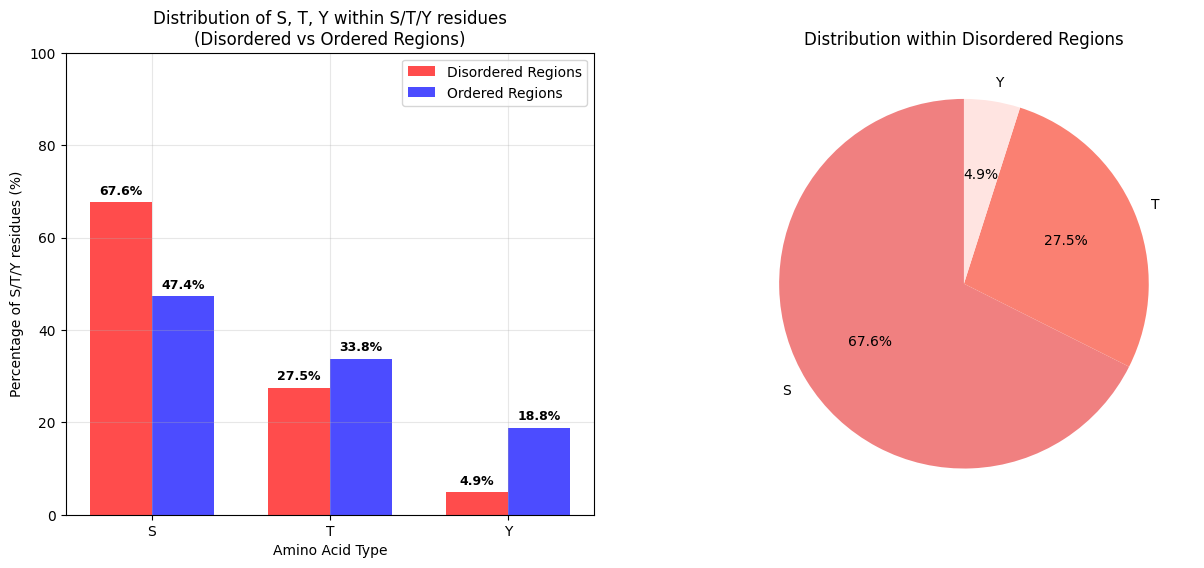

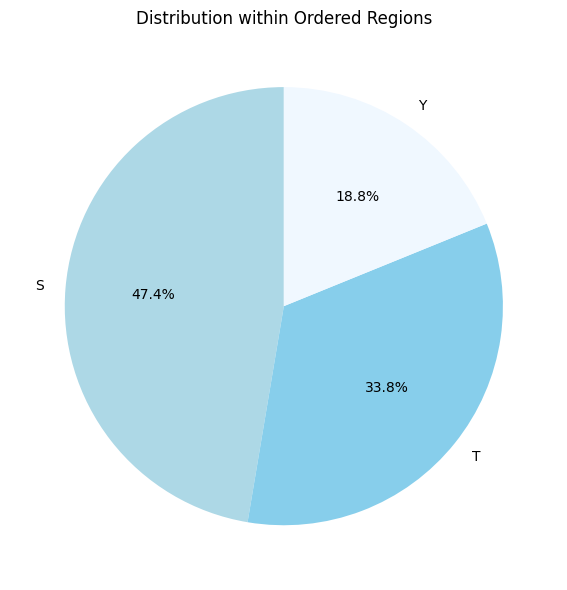


KEY INSIGHTS:
• In disordered regions: S is most abundant (67.6%), Y is least (4.9%)
• In ordered regions: S is most abundant (47.4%), Y is least (18.8%)
• S shows 1.4x higher representation in disordered vs ordered regions
• T shows 0.8x higher representation in disordered vs ordered regions
• Y shows 0.3x higher representation in disordered vs ordered regions


In [ ]:
# Cell 9: Distribution of S, T, Y residues within ordered and disordered regions
# This cell uses values calculated in previous cells

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

print("=" * 80)
print("DISTRIBUTION OF S, T, Y RESIDUES WITHIN ORDERED AND DISORDERED REGIONS")
print("=" * 80)

# Check if variables exist from previous cells, if not, recalculate them
try:
    # Try to use existing variables
    test = s_disordered + t_disordered + y_disordered
    print("Using values from previous cells...")
except NameError:
    print("Variables not found from previous cells. Recalculating...")
    
    # Recalculate the values from the previous cell
    punch2_dir = '../outputs/punch2/Punch2_results_mouse'
    
    if not os.path.exists(punch2_dir):
        print(f"Error: PUNCH2 directory not found: {punch2_dir}")
        print("Please run the previous cell first to generate the required data.")
    else:
        # Initialize counters
        s_disordered = 0
        s_ordered = 0
        t_disordered = 0
        t_ordered = 0
        y_disordered = 0
        y_ordered = 0
        
        # Get all CSV files in the directory
        csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))
        print(f"Found {len(csv_files)} PUNCH2 result files")
        
        # Process each file
        for i, file_path in enumerate(csv_files):
            if i % 1000 == 0:
                print(f"Processing file {i+1}/{len(csv_files)}")
            
            try:
                with open(file_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split(',')
                        if len(parts) >= 4:
                            try:
                                position = int(float(parts[0]))
                                amino_acid = parts[1]
                                disorder_score = float(parts[2])
                                is_disordered = int(parts[3])
                                
                                # Count S, T, Y residues
                                if amino_acid == 'S':
                                    if is_disordered == 1:
                                        s_disordered += 1
                                    else:
                                        s_ordered += 1
                                elif amino_acid == 'T':
                                    if is_disordered == 1:
                                        t_disordered += 1
                                    else:
                                        t_ordered += 1
                                elif amino_acid == 'Y':
                                    if is_disordered == 1:
                                        y_disordered += 1
                                    else:
                                        y_ordered += 1
                            except (ValueError, IndexError):
                                continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
        
        print(f"Completed processing {len(csv_files)} files")
        print(f"S residues - Disordered: {s_disordered:,}, Ordered: {s_ordered:,}")
        print(f"T residues - Disordered: {t_disordered:,}, Ordered: {t_ordered:,}")
        print(f"Y residues - Disordered: {y_disordered:,}, Ordered: {y_ordered:,}")

# Calculate the distribution of S, T, Y within disordered regions
total_disordered_sty = s_disordered + t_disordered + y_disordered
s_in_disordered_pct = (s_disordered / total_disordered_sty) * 100
t_in_disordered_pct = (t_disordered / total_disordered_sty) * 100
y_in_disordered_pct = (y_disordered / total_disordered_sty) * 100

# Calculate the distribution of S, T, Y within ordered regions
total_ordered_sty = s_ordered + t_ordered + y_ordered
s_in_ordered_pct = (s_ordered / total_ordered_sty) * 100
t_in_ordered_pct = (t_ordered / total_ordered_sty) * 100
y_in_ordered_pct = (y_ordered / total_ordered_sty) * 100

print(f"\nWITHIN DISORDERED REGIONS:")
print(f"  Total S/T/Y residues in disordered regions: {total_disordered_sty:,}")
print(f"  S: {s_disordered:,} ({s_in_disordered_pct:.1f}% of disordered S/T/Y)")
print(f"  T: {t_disordered:,} ({t_in_disordered_pct:.1f}% of disordered S/T/Y)")
print(f"  Y: {y_disordered:,} ({y_in_disordered_pct:.1f}% of disordered S/T/Y)")

print(f"\nWITHIN ORDERED REGIONS:")
print(f"  Total S/T/Y residues in ordered regions: {total_ordered_sty:,}")
print(f"  S: {s_ordered:,} ({s_in_ordered_pct:.1f}% of ordered S/T/Y)")
print(f"  T: {t_ordered:,} ({t_in_ordered_pct:.1f}% of ordered S/T/Y)")
print(f"  Y: {y_ordered:,} ({y_in_ordered_pct:.1f}% of ordered S/T/Y)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Distribution within disordered regions
amino_acids = ['S', 'T', 'Y']
disordered_distribution = [s_in_disordered_pct, t_in_disordered_pct, y_in_disordered_pct]
ordered_distribution = [s_in_ordered_pct, t_in_ordered_pct, y_in_ordered_pct]

# Side-by-side comparison
x = np.arange(len(amino_acids))
width = 0.35

bars1 = ax1.bar(x - width/2, disordered_distribution, width, label='Disordered Regions', color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, ordered_distribution, width, label='Ordered Regions', color='blue', alpha=0.7)

ax1.set_xlabel('Amino Acid Type')
ax1.set_ylabel('Percentage of S/T/Y residues (%)')
ax1.set_title('Distribution of S, T, Y within S/T/Y residues\n(Disordered vs Ordered Regions)')
ax1.set_xticks(x)
ax1.set_xticklabels(amino_acids)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

# Add value labels
for bar, pct in zip(bars1, disordered_distribution):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, pct in zip(bars2, ordered_distribution):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Pie charts for each region type
# Disordered regions pie chart
ax2.pie(disordered_distribution, labels=amino_acids, autopct='%1.1f%%', 
        colors=['lightcoral', 'salmon', 'mistyrose'], startangle=90)
ax2.set_title('Distribution within Disordered Regions')

# Add a second pie chart for ordered regions
fig2, ax3 = plt.subplots(1, 1, figsize=(8, 6))
ax3.pie(ordered_distribution, labels=amino_acids, autopct='%1.1f%%', 
        colors=['lightblue', 'skyblue', 'aliceblue'], startangle=90)
ax3.set_title('Distribution within Ordered Regions')

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)

# Find which amino acid is most/least represented in each region
max_disordered = amino_acids[np.argmax(disordered_distribution)]
min_disordered = amino_acids[np.argmin(disordered_distribution)]
max_ordered = amino_acids[np.argmax(ordered_distribution)]
min_ordered = amino_acids[np.argmin(ordered_distribution)]

print(f"• In disordered regions: {max_disordered} is most abundant ({max(disordered_distribution):.1f}%), {min_disordered} is least ({min(disordered_distribution):.1f}%)")
print(f"• In ordered regions: {max_ordered} is most abundant ({max(ordered_distribution):.1f}%), {min_ordered} is least ({min(ordered_distribution):.1f}%)")

# Compare S vs T vs Y representation
s_ratio = s_in_disordered_pct / s_in_ordered_pct
t_ratio = t_in_disordered_pct / t_in_ordered_pct
y_ratio = y_in_disordered_pct / y_in_ordered_pct

print(f"• S shows {s_ratio:.1f}x higher representation in disordered vs ordered regions")
print(f"• T shows {t_ratio:.1f}x higher representation in disordered vs ordered regions") 
print(f"• Y shows {y_ratio:.1f}x higher representation in disordered vs ordered regions")


DISTRIBUTION OF S, T, Y RESIDUES WITHIN ORDERED AND DISORDERED REGIONS (RAT)
Variables not found from previous cells. Recalculating for RAT data...
Found 5772 PUNCH2 result files
Processing file 1/5772
Processing file 1001/5772
Processing file 2001/5772
Processing file 3001/5772
Processing file 4001/5772
Processing file 5001/5772
Completed processing 5772 files
S residues - Disordered: 166,104, Ordered: 245,306
T residues - Disordered: 68,317, Ordered: 176,028
Y residues - Disordered: 12,146, Ordered: 97,794

WITHIN DISORDERED REGIONS (RAT):
  Total S/T/Y residues in disordered regions: 246,567
  S: 166,104 (67.4% of disordered S/T/Y)
  T: 68,317 (27.7% of disordered S/T/Y)
  Y: 12,146 (4.9% of disordered S/T/Y)

WITHIN ORDERED REGIONS (RAT):
  Total S/T/Y residues in ordered regions: 519,128
  S: 245,306 (47.3% of ordered S/T/Y)
  T: 176,028 (33.9% of ordered S/T/Y)
  Y: 97,794 (18.8% of ordered S/T/Y)


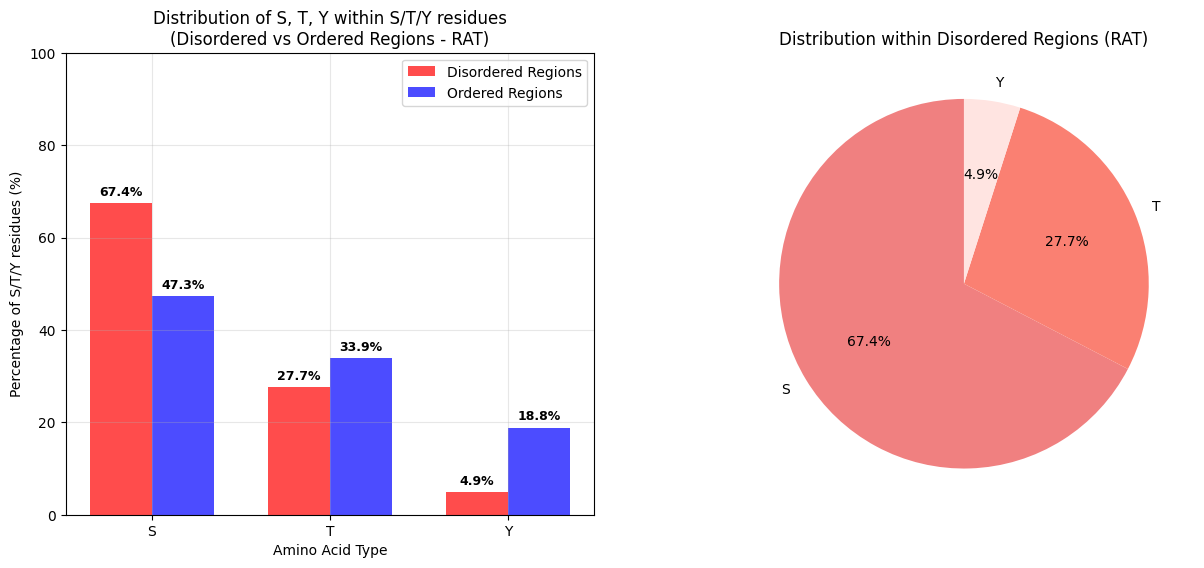

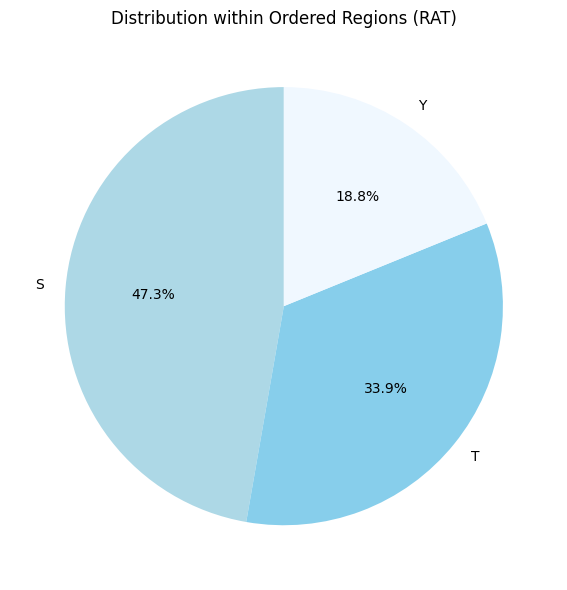


KEY INSIGHTS (RAT DATA):
• In disordered regions: S is most abundant (67.4%), Y is least (4.9%)
• In ordered regions: S is most abundant (47.3%), Y is least (18.8%)
• S shows 1.4x higher representation in disordered vs ordered regions
• T shows 0.8x higher representation in disordered vs ordered regions
• Y shows 0.3x higher representation in disordered vs ordered regions


In [ ]:
# Cell 10: Distribution of S, T, Y residues within ordered and disordered regions (RAT DATA)
# This cell uses values calculated in previous cells

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

print("=" * 80)
print("DISTRIBUTION OF S, T, Y RESIDUES WITHIN ORDERED AND DISORDERED REGIONS (RAT)")
print("=" * 80)

# Check if variables exist from previous cells, if not, recalculate them
try:
    # Try to use existing variables (rat-specific)
    test = s_disordered_rat + t_disordered_rat + y_disordered_rat
    print("Using values from previous cells...")
except NameError:
    print("Variables not found from previous cells. Recalculating for RAT data...")
    
    # Recalculate the values from the previous cell for RAT data
    punch2_dir = '../outputs/punch2/Punch2_results_rat'
    
    if not os.path.exists(punch2_dir):
        print(f"Error: PUNCH2 directory not found: {punch2_dir}")
        print("Please run the previous cell first to generate the required data.")
    else:
        # Initialize counters
        s_disordered_rat = 0
        s_ordered_rat = 0
        t_disordered_rat = 0
        t_ordered_rat = 0
        y_disordered_rat = 0
        y_ordered_rat = 0
        
        # Get all CSV files in the directory
        csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))
        print(f"Found {len(csv_files)} PUNCH2 result files")
        
        # Process each file
        for i, file_path in enumerate(csv_files):
            if i % 1000 == 0:
                print(f"Processing file {i+1}/{len(csv_files)}")
            
            try:
                with open(file_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split(',')
                        if len(parts) >= 4:
                            try:
                                position = int(float(parts[0]))
                                amino_acid = parts[1]
                                disorder_score = float(parts[2])
                                is_disordered = int(parts[3])
                                
                                # Count S, T, Y residues
                                if amino_acid == 'S':
                                    if is_disordered == 1:
                                        s_disordered_rat += 1
                                    else:
                                        s_ordered_rat += 1
                                elif amino_acid == 'T':
                                    if is_disordered == 1:
                                        t_disordered_rat += 1
                                    else:
                                        t_ordered_rat += 1
                                elif amino_acid == 'Y':
                                    if is_disordered == 1:
                                        y_disordered_rat += 1
                                    else:
                                        y_ordered_rat += 1
                            except (ValueError, IndexError):
                                continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
        
        print(f"Completed processing {len(csv_files)} files")
        print(f"S residues - Disordered: {s_disordered_rat:,}, Ordered: {s_ordered_rat:,}")
        print(f"T residues - Disordered: {t_disordered_rat:,}, Ordered: {t_ordered_rat:,}")
        print(f"Y residues - Disordered: {y_disordered_rat:,}, Ordered: {y_ordered_rat:,}")

# Calculate the distribution of S, T, Y within disordered regions
total_disordered_sty_rat = s_disordered_rat + t_disordered_rat + y_disordered_rat
s_in_disordered_pct_rat = (s_disordered_rat / total_disordered_sty_rat) * 100
t_in_disordered_pct_rat = (t_disordered_rat / total_disordered_sty_rat) * 100
y_in_disordered_pct_rat = (y_disordered_rat / total_disordered_sty_rat) * 100

# Calculate the distribution of S, T, Y within ordered regions
total_ordered_sty_rat = s_ordered_rat + t_ordered_rat + y_ordered_rat
s_in_ordered_pct_rat = (s_ordered_rat / total_ordered_sty_rat) * 100
t_in_ordered_pct_rat = (t_ordered_rat / total_ordered_sty_rat) * 100
y_in_ordered_pct_rat = (y_ordered_rat / total_ordered_sty_rat) * 100

print(f"\nWITHIN DISORDERED REGIONS (RAT):")
print(f"  Total S/T/Y residues in disordered regions: {total_disordered_sty_rat:,}")
print(f"  S: {s_disordered_rat:,} ({s_in_disordered_pct_rat:.1f}% of disordered S/T/Y)")
print(f"  T: {t_disordered_rat:,} ({t_in_disordered_pct_rat:.1f}% of disordered S/T/Y)")
print(f"  Y: {y_disordered_rat:,} ({y_in_disordered_pct_rat:.1f}% of disordered S/T/Y)")

print(f"\nWITHIN ORDERED REGIONS (RAT):")
print(f"  Total S/T/Y residues in ordered regions: {total_ordered_sty_rat:,}")
print(f"  S: {s_ordered_rat:,} ({s_in_ordered_pct_rat:.1f}% of ordered S/T/Y)")
print(f"  T: {t_ordered_rat:,} ({t_in_ordered_pct_rat:.1f}% of ordered S/T/Y)")
print(f"  Y: {y_ordered_rat:,} ({y_in_ordered_pct_rat:.1f}% of ordered S/T/Y)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Distribution within disordered regions
amino_acids = ['S', 'T', 'Y']
disordered_distribution_rat = [s_in_disordered_pct_rat, t_in_disordered_pct_rat, y_in_disordered_pct_rat]
ordered_distribution_rat = [s_in_ordered_pct_rat, t_in_ordered_pct_rat, y_in_ordered_pct_rat]

# Side-by-side comparison
x = np.arange(len(amino_acids))
width = 0.35

bars1 = ax1.bar(x - width/2, disordered_distribution_rat, width, label='Disordered Regions', color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, ordered_distribution_rat, width, label='Ordered Regions', color='blue', alpha=0.7)

ax1.set_xlabel('Amino Acid Type')
ax1.set_ylabel('Percentage of S/T/Y residues (%)')
ax1.set_title('Distribution of S, T, Y within S/T/Y residues\n(Disordered vs Ordered Regions - RAT)')
ax1.set_xticks(x)
ax1.set_xticklabels(amino_acids)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

# Add value labels
for bar, pct in zip(bars1, disordered_distribution_rat):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, pct in zip(bars2, ordered_distribution_rat):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Pie charts for each region type
# Disordered regions pie chart
ax2.pie(disordered_distribution_rat, labels=amino_acids, autopct='%1.1f%%', 
        colors=['lightcoral', 'salmon', 'mistyrose'], startangle=90)
ax2.set_title('Distribution within Disordered Regions (RAT)')

# Add a second pie chart for ordered regions
fig2, ax3 = plt.subplots(1, 1, figsize=(8, 6))
ax3.pie(ordered_distribution_rat, labels=amino_acids, autopct='%1.1f%%', 
        colors=['lightblue', 'skyblue', 'aliceblue'], startangle=90)
ax3.set_title('Distribution within Ordered Regions (RAT)')

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n" + "="*60)
print("KEY INSIGHTS (RAT DATA):")
print("="*60)

# Find which amino acid is most/least represented in each region
max_disordered_rat = amino_acids[np.argmax(disordered_distribution_rat)]
min_disordered_rat = amino_acids[np.argmin(disordered_distribution_rat)]
max_ordered_rat = amino_acids[np.argmax(ordered_distribution_rat)]
min_ordered_rat = amino_acids[np.argmin(ordered_distribution_rat)]

print(f"• In disordered regions: {max_disordered_rat} is most abundant ({max(disordered_distribution_rat):.1f}%), {min_disordered_rat} is least ({min(disordered_distribution_rat):.1f}%)")
print(f"• In ordered regions: {max_ordered_rat} is most abundant ({max(ordered_distribution_rat):.1f}%), {min_ordered_rat} is least ({min(ordered_distribution_rat):.1f}%)")

# Compare S vs T vs Y representation
s_ratio_rat = s_in_disordered_pct_rat / s_in_ordered_pct_rat
t_ratio_rat = t_in_disordered_pct_rat / t_in_ordered_pct_rat
y_ratio_rat = y_in_disordered_pct_rat / y_in_ordered_pct_rat

print(f"• S shows {s_ratio_rat:.1f}x higher representation in disordered vs ordered regions")
print(f"• T shows {t_ratio_rat:.1f}x higher representation in disordered vs ordered regions") 
print(f"• Y shows {y_ratio_rat:.1f}x higher representation in disordered vs ordered regions")


PHOSPHORYLATION SITES BY TISSUE COUNT AND DISORDER STATUS (MOUSE)
Loaded 30442 phosphorylation sites from mouse data
Found 30442 S/T/Y phosphorylation sites
Tissue counts found: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Tissue Count 1:
  Total sites: 13,653
  Ordered: 5,041 (36.9%)
  Disordered: 8,200 (60.1%)
  Within Ordered - S: 76.6%, T: 18.2%, Y: 5.2%
  Within Disordered - S: 81.7%, T: 16.8%, Y: 1.5%

Tissue Count 2:
  Total sites: 4,965
  Ordered: 1,644 (33.1%)
  Disordered: 3,187 (64.2%)
  Within Ordered - S: 82.7%, T: 14.2%, Y: 3.2%
  Within Disordered - S: 85.2%, T: 13.7%, Y: 1.1%

Tissue Count 3:
  Total sites: 3,101
  Ordered: 979 (31.6%)
  Disordered: 1,990 (64.2%)
  Within Ordered - S: 81.6%, T: 15.4%, Y: 3.0%
  Within Disordered - S: 83.8%, T: 14.6%, Y: 1.6%

Tissue Count 4:
  Total sites: 2,214
  Ordered: 645 (29.1%)
  Disordered: 1,522 (68.7%)
  Within Ordered - S: 86.0%, T: 10.9%, Y: 3.1%
  Wit

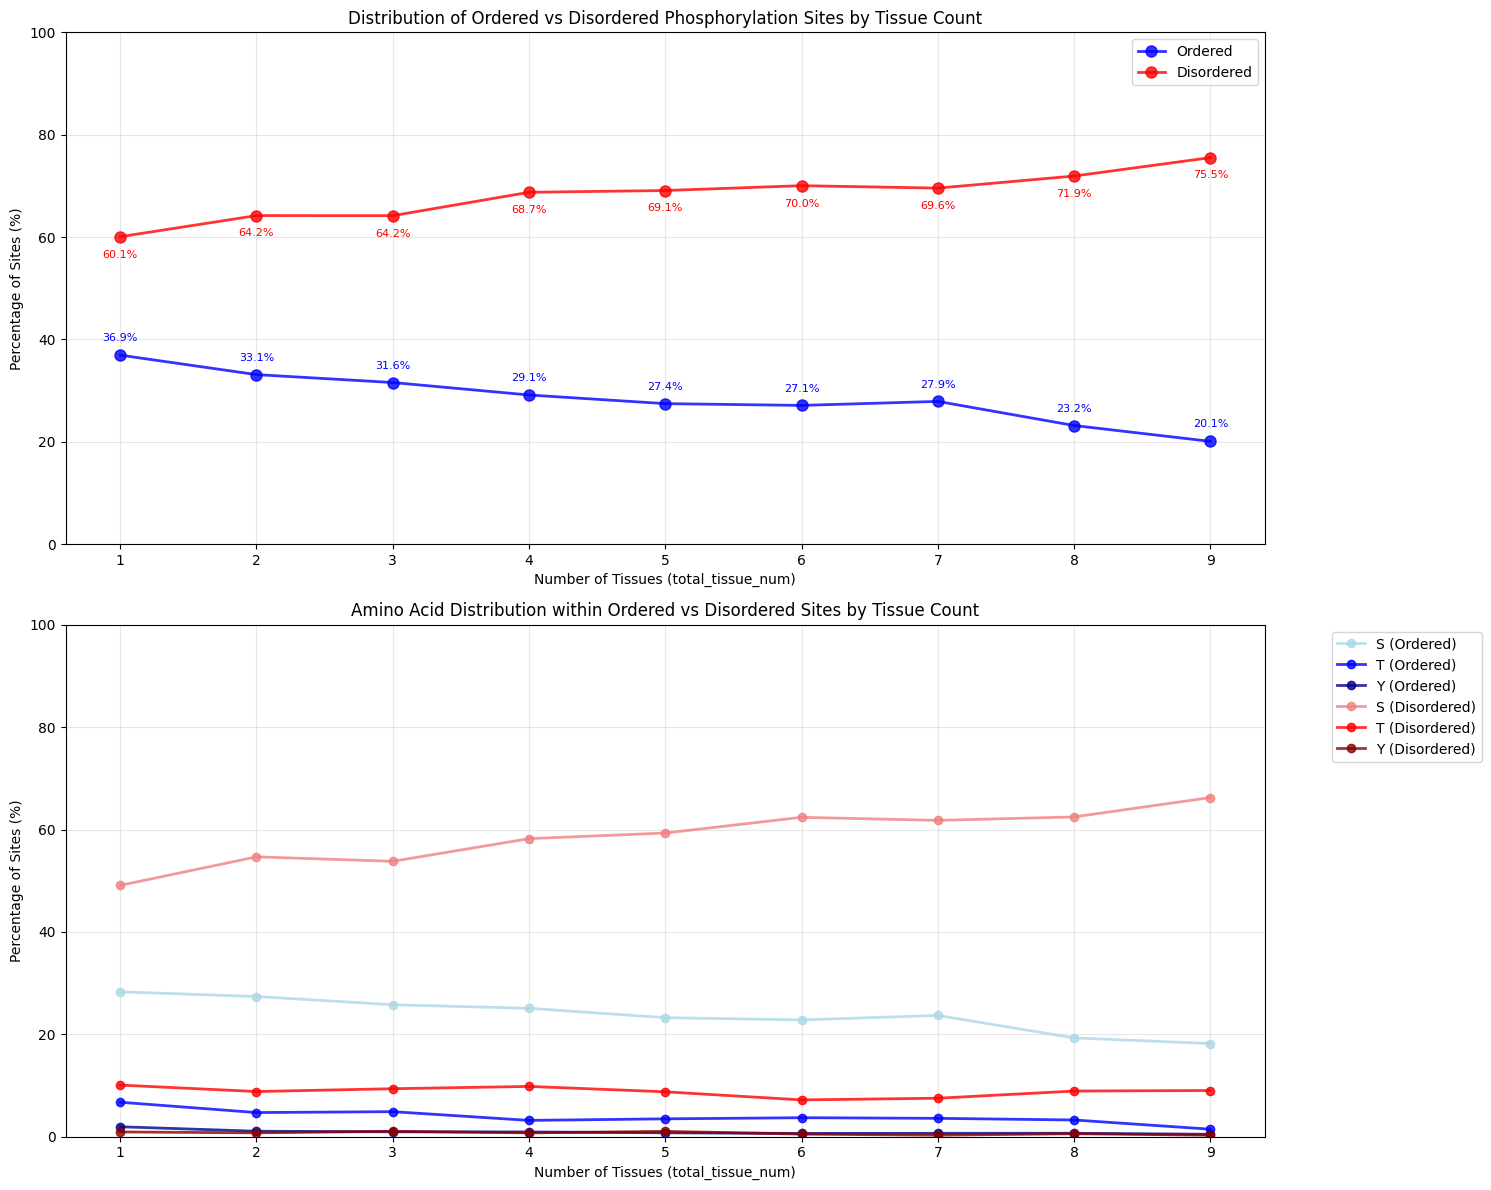


SUMMARY STATISTICS:
Overall distribution:
  Total sites: 30,442
  Ordered: 9,967 (32.7%)
  Disordered: 19,517 (64.1%)

Most common tissue count: 1 tissues (13,653.0 sites)
Sites in all 9 tissues: 1,111.0 sites
  Ordered: 20.1%
  Disordered: 75.5%


In [ ]:
# Cell 11: Phosphorylation sites by tissue count and disorder status (MOUSE DATA)
# Analysis of sites present in 1, 2, 3... tissues and their disorder/order distribution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("PHOSPHORYLATION SITES BY TISSUE COUNT AND DISORDER STATUS (MOUSE)")
print("=" * 80)

# Load the mouse disorder data
mouse_disorder_file = '../data/processed/mouse/full_disorder.csv'

if not os.path.exists(mouse_disorder_file):
    print(f"Error: Mouse disorder file not found: {mouse_disorder_file}")
    print("Please run the integration script first to generate the required data.")
else:
    df_mouse = pd.read_csv(mouse_disorder_file)
    print(f"Loaded {len(df_mouse)} phosphorylation sites from mouse data")
    
    # Filter for S, T, Y residues only
    df_mouse_sty = df_mouse[df_mouse['amino_acid'].isin(['S', 'T', 'Y'])]
    print(f"Found {len(df_mouse_sty)} S/T/Y phosphorylation sites")
    
    # Use the existing total_tissue_num column
    # Get unique tissue counts and sort them
    unique_tissue_counts = sorted(df_mouse_sty['total_tissue_num'].unique())
    print(f"Tissue counts found: {unique_tissue_counts}")
    
    # Prepare data for visualization
    results = []
    
    for tissue_count in unique_tissue_counts:
        # Filter sites present in this many tissues
        sites_in_count = df_mouse_sty[df_mouse_sty['total_tissue_num'] == tissue_count]
        
        if len(sites_in_count) == 0:
            continue
            
        # Count ordered vs disordered
        ordered_sites = sites_in_count[sites_in_count['disordered?'] == 0]
        disordered_sites = sites_in_count[sites_in_count['disordered?'] == 1]
        
        total_sites = len(sites_in_count)
        ordered_pct = (len(ordered_sites) / total_sites) * 100
        disordered_pct = (len(disordered_sites) / total_sites) * 100
        
        # Within ordered sites, count S, T, Y
        ordered_s = len(ordered_sites[ordered_sites['amino_acid'] == 'S'])
        ordered_t = len(ordered_sites[ordered_sites['amino_acid'] == 'T'])
        ordered_y = len(ordered_sites[ordered_sites['amino_acid'] == 'Y'])
        
        # Within disordered sites, count S, T, Y
        disordered_s = len(disordered_sites[disordered_sites['amino_acid'] == 'S'])
        disordered_t = len(disordered_sites[disordered_sites['amino_acid'] == 'T'])
        disordered_y = len(disordered_sites[disordered_sites['amino_acid'] == 'Y'])
        
        # Calculate percentages within each category
        if len(ordered_sites) > 0:
            ordered_s_pct = (ordered_s / len(ordered_sites)) * 100
            ordered_t_pct = (ordered_t / len(ordered_sites)) * 100
            ordered_y_pct = (ordered_y / len(ordered_sites)) * 100
        else:
            ordered_s_pct = ordered_t_pct = ordered_y_pct = 0
            
        if len(disordered_sites) > 0:
            disordered_s_pct = (disordered_s / len(disordered_sites)) * 100
            disordered_t_pct = (disordered_t / len(disordered_sites)) * 100
            disordered_y_pct = (disordered_y / len(disordered_sites)) * 100
        else:
            disordered_s_pct = disordered_t_pct = disordered_y_pct = 0
        
        results.append({
            'tissue_count': tissue_count,
            'total_sites': total_sites,
            'ordered_pct': ordered_pct,
            'disordered_pct': disordered_pct,
            'ordered_s_pct': ordered_s_pct,
            'ordered_t_pct': ordered_t_pct,
            'ordered_y_pct': ordered_y_pct,
            'disordered_s_pct': disordered_s_pct,
            'disordered_t_pct': disordered_t_pct,
            'disordered_y_pct': disordered_y_pct,
            'ordered_sites': len(ordered_sites),
            'disordered_sites': len(disordered_sites)
        })
        
        print(f"\nTissue Count {tissue_count}:")
        print(f"  Total sites: {total_sites:,}")
        print(f"  Ordered: {len(ordered_sites):,} ({ordered_pct:.1f}%)")
        print(f"  Disordered: {len(disordered_sites):,} ({disordered_pct:.1f}%)")
        print(f"  Within Ordered - S: {ordered_s_pct:.1f}%, T: {ordered_t_pct:.1f}%, Y: {ordered_y_pct:.1f}%")
        print(f"  Within Disordered - S: {disordered_s_pct:.1f}%, T: {disordered_t_pct:.1f}%, Y: {disordered_y_pct:.1f}%")
    
    # Create visualization
    results_df = pd.DataFrame(results)
    
    # Create the main plot with dot and line graphs
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Ordered vs Disordered percentages as line plot
    tissue_counts = results_df['tissue_count'].values
    
    # Plot lines with dots
    ax1.plot(tissue_counts, results_df['ordered_pct'], 'o-', label='Ordered', color='blue', linewidth=2, markersize=8, alpha=0.8)
    ax1.plot(tissue_counts, results_df['disordered_pct'], 'o-', label='Disordered', color='red', linewidth=2, markersize=8, alpha=0.8)
    
    ax1.set_xlabel('Number of Tissues (total_tissue_num)')
    ax1.set_ylabel('Percentage of Sites (%)')
    ax1.set_title('Distribution of Ordered vs Disordered Phosphorylation Sites by Tissue Count')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels on points
    for i, (tissue_count, ordered_pct, disordered_pct) in enumerate(zip(tissue_counts, results_df['ordered_pct'], results_df['disordered_pct'])):
        ax1.annotate(f'{ordered_pct:.1f}%', (tissue_count, ordered_pct), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
        ax1.annotate(f'{disordered_pct:.1f}%', (tissue_count, disordered_pct), 
                    textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='red')
    
    # Plot 2: Amino acid distribution within ordered and disordered as line plots
    # Ordered sites - S, T, Y breakdown
    ordered_s_pct = results_df['ordered_pct'] * results_df['ordered_s_pct'] / 100
    ordered_t_pct = results_df['ordered_pct'] * results_df['ordered_t_pct'] / 100
    ordered_y_pct = results_df['ordered_pct'] * results_df['ordered_y_pct'] / 100
    
    # Disordered sites - S, T, Y breakdown
    disordered_s_pct = results_df['disordered_pct'] * results_df['disordered_s_pct'] / 100
    disordered_t_pct = results_df['disordered_pct'] * results_df['disordered_t_pct'] / 100
    disordered_y_pct = results_df['disordered_pct'] * results_df['disordered_y_pct'] / 100
    
    # Plot ordered sites
    ax2.plot(tissue_counts, ordered_s_pct, 'o-', label='S (Ordered)', color='lightblue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_t_pct, 'o-', label='T (Ordered)', color='blue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_y_pct, 'o-', label='Y (Ordered)', color='darkblue', linewidth=2, markersize=6, alpha=0.8)
    
    # Plot disordered sites
    ax2.plot(tissue_counts, disordered_s_pct, 'o-', label='S (Disordered)', color='lightcoral', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_t_pct, 'o-', label='T (Disordered)', color='red', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_y_pct, 'o-', label='Y (Disordered)', color='darkred', linewidth=2, markersize=6, alpha=0.8)
    
    ax2.set_xlabel('Number of Tissues (total_tissue_num)')
    ax2.set_ylabel('Percentage of Sites (%)')
    ax2.set_title('Amino Acid Distribution within Ordered vs Disordered Sites by Tissue Count')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n" + "="*60)
    print("SUMMARY STATISTICS:")
    print("="*60)
    
    # Overall statistics
    total_ordered = df_mouse_sty[df_mouse_sty['disordered?'] == 0]
    total_disordered = df_mouse_sty[df_mouse_sty['disordered?'] == 1]
    
    print(f"Overall distribution:")
    print(f"  Total sites: {len(df_mouse_sty):,}")
    print(f"  Ordered: {len(total_ordered):,} ({len(total_ordered)/len(df_mouse_sty)*100:.1f}%)")
    print(f"  Disordered: {len(total_disordered):,} ({len(total_disordered)/len(df_mouse_sty)*100:.1f}%)")
    
    # Most common tissue counts
    most_common = results_df.loc[results_df['total_sites'].idxmax()]
    print(f"\nMost common tissue count: {int(most_common['tissue_count'])} tissues ({most_common['total_sites']:,} sites)")
    
    # Sites in all tissues
    all_tissues = results_df[results_df['tissue_count'] == max(results_df['tissue_count'])]
    if len(all_tissues) > 0:
        all_tissue_data = all_tissues.iloc[0]
        print(f"Sites in all {int(all_tissue_data['tissue_count'])} tissues: {all_tissue_data['total_sites']:,} sites")
        print(f"  Ordered: {all_tissue_data['ordered_pct']:.1f}%")
        print(f"  Disordered: {all_tissue_data['disordered_pct']:.1f}%")


DISTRIBUTION OF S, T, Y RESIDUES RELATIVE TO ALL RESIDUES (RAT)
Variables not found from previous cells. Recalculating for RAT data...
Found 5772 PUNCH2 result files
Processing file 1/5772
Processing file 1001/5772
Processing file 2001/5772
Processing file 3001/5772
Processing file 4001/5772
Processing file 5001/5772
Completed processing 5772 files
S residues - Disordered: 166,104, Ordered: 245,306
T residues - Disordered: 68,317, Ordered: 176,028
Y residues - Disordered: 12,146, Ordered: 97,794

Calculating total residues in each region type...
Processing file 1/5772 for total residue counts
Processing file 1001/5772 for total residue counts
Processing file 2001/5772 for total residue counts
Processing file 3001/5772 for total residue counts
Processing file 4001/5772 for total residue counts
Processing file 5001/5772 for total residue counts
Total disordered residues: 1,197,061
Total ordered residues: 3,398,143

PERCENTAGE OF S/T/Y RESIDUES RELATIVE TO ALL RESIDUES (RAT):
DISORDERED R

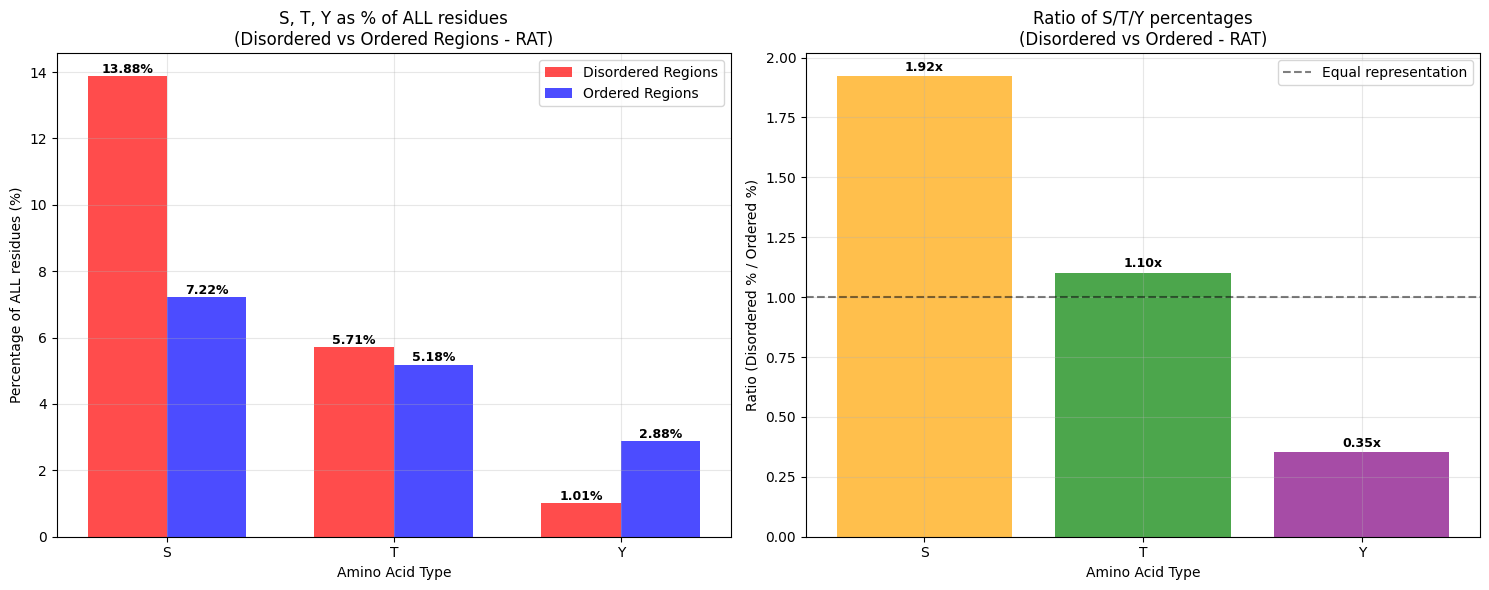


KEY INSIGHTS (RAT DATA - Relative to ALL residues):
• S residues: 1.92x more abundant in disordered vs ordered regions
• T residues: 1.10x more abundant in disordered vs ordered regions
• Y residues: 0.35x more abundant in disordered vs ordered regions
• S shows the greatest difference between regions (1.92x)
• Total S/T/Y in disordered regions: 20.60% of all residues
• Total S/T/Y in ordered regions: 15.28% of all residues
• Overall S/T/Y ratio (disordered/ordered): 1.35x


In [1]:
# Cell 11: Distribution of S, T, Y residues relative to ALL residues in ordered vs disordered regions (RAT DATA)
# This cell calculates the percentage of S/T/Y residues relative to ALL residues (not just S/T/Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

print("=" * 80)
print("DISTRIBUTION OF S, T, Y RESIDUES RELATIVE TO ALL RESIDUES (RAT)")
print("=" * 80)

# Check if variables exist from previous cells, if not, recalculate them
try:
    # Try to use existing variables (rat-specific)
    test = s_disordered_rat + t_disordered_rat + y_disordered_rat
    print("Using S/T/Y counts from previous cells...")
except NameError:
    print("Variables not found from previous cells. Recalculating for RAT data...")
    
    # Recalculate the values from the previous cell for RAT data
    punch2_dir = '../outputs/punch2/Punch2_results_rat'
    
    if not os.path.exists(punch2_dir):
        print(f"Error: PUNCH2 directory not found: {punch2_dir}")
        print("Please run the previous cell first to generate the required data.")
    else:
        # Initialize counters
        s_disordered_rat = 0
        s_ordered_rat = 0
        t_disordered_rat = 0
        t_ordered_rat = 0
        y_disordered_rat = 0
        y_ordered_rat = 0
        
        # Get all CSV files in the directory
        csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))
        print(f"Found {len(csv_files)} PUNCH2 result files")
        
        # Process each file
        for i, file_path in enumerate(csv_files):
            if i % 1000 == 0:
                print(f"Processing file {i+1}/{len(csv_files)}")
            
            try:
                with open(file_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split(',')
                        if len(parts) >= 4:
                            try:
                                position = int(float(parts[0]))
                                amino_acid = parts[1]
                                disorder_score = float(parts[2])
                                is_disordered = int(parts[3])
                                
                                # Count S, T, Y residues
                                if amino_acid == 'S':
                                    if is_disordered == 1:
                                        s_disordered_rat += 1
                                    else:
                                        s_ordered_rat += 1
                                elif amino_acid == 'T':
                                    if is_disordered == 1:
                                        t_disordered_rat += 1
                                    else:
                                        t_ordered_rat += 1
                                elif amino_acid == 'Y':
                                    if is_disordered == 1:
                                        y_disordered_rat += 1
                                    else:
                                        y_ordered_rat += 1
                            except (ValueError, IndexError):
                                continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
        
        print(f"Completed processing {len(csv_files)} files")
        print(f"S residues - Disordered: {s_disordered_rat:,}, Ordered: {s_ordered_rat:,}")
        print(f"T residues - Disordered: {t_disordered_rat:,}, Ordered: {t_ordered_rat:,}")
        print(f"Y residues - Disordered: {y_disordered_rat:,}, Ordered: {y_ordered_rat:,}")

# Now calculate total residues in each region type
print("\nCalculating total residues in each region type...")

# Initialize counters for total residues
total_disordered_residues_rat = 0
total_ordered_residues_rat = 0

punch2_dir = '../outputs/punch2/Punch2_results_rat'
csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

# Process each file to count ALL residues
for i, file_path in enumerate(csv_files):
    if i % 1000 == 0:
        print(f"Processing file {i+1}/{len(csv_files)} for total residue counts")
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) >= 4:
                    try:
                        position = int(float(parts[0]))
                        amino_acid = parts[1]
                        disorder_score = float(parts[2])
                        is_disordered = int(parts[3])
                        
                        # Count ALL residues (not just S/T/Y)
                        if is_disordered == 1:
                            total_disordered_residues_rat += 1
                        elif is_disordered == 0:
                            total_ordered_residues_rat += 1
                    except (ValueError, IndexError):
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        continue

print(f"Total disordered residues: {total_disordered_residues_rat:,}")
print(f"Total ordered residues: {total_ordered_residues_rat:,}")

# Calculate percentages of S, T, Y relative to ALL residues in each region
s_disordered_pct_all_rat = (s_disordered_rat / total_disordered_residues_rat) * 100
t_disordered_pct_all_rat = (t_disordered_rat / total_disordered_residues_rat) * 100
y_disordered_pct_all_rat = (y_disordered_rat / total_disordered_residues_rat) * 100

s_ordered_pct_all_rat = (s_ordered_rat / total_ordered_residues_rat) * 100
t_ordered_pct_all_rat = (t_ordered_rat / total_ordered_residues_rat) * 100
y_ordered_pct_all_rat = (y_ordered_rat / total_ordered_residues_rat) * 100

print(f"\nPERCENTAGE OF S/T/Y RESIDUES RELATIVE TO ALL RESIDUES (RAT):")
print(f"DISORDERED REGIONS:")
print(f"  S: {s_disordered_rat:,} / {total_disordered_residues_rat:,} = {s_disordered_pct_all_rat:.2f}%")
print(f"  T: {t_disordered_rat:,} / {total_disordered_residues_rat:,} = {t_disordered_pct_all_rat:.2f}%")
print(f"  Y: {y_disordered_rat:,} / {total_disordered_residues_rat:,} = {y_disordered_pct_all_rat:.2f}%")

print(f"\nORDERED REGIONS:")
print(f"  S: {s_ordered_rat:,} / {total_ordered_residues_rat:,} = {s_ordered_pct_all_rat:.2f}%")
print(f"  T: {t_ordered_rat:,} / {total_ordered_residues_rat:,} = {t_ordered_pct_all_rat:.2f}%")
print(f"  Y: {y_ordered_rat:,} / {total_ordered_residues_rat:,} = {y_ordered_pct_all_rat:.2f}%")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Side-by-side comparison of S/T/Y percentages in disordered vs ordered regions
amino_acids = ['S', 'T', 'Y']
disordered_pct_all = [s_disordered_pct_all_rat, t_disordered_pct_all_rat, y_disordered_pct_all_rat]
ordered_pct_all = [s_ordered_pct_all_rat, t_ordered_pct_all_rat, y_ordered_pct_all_rat]

x = np.arange(len(amino_acids))
width = 0.35

bars1 = ax1.bar(x - width/2, disordered_pct_all, width, label='Disordered Regions', color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, ordered_pct_all, width, label='Ordered Regions', color='blue', alpha=0.7)

ax1.set_xlabel('Amino Acid Type')
ax1.set_ylabel('Percentage of ALL residues (%)')
ax1.set_title('S, T, Y as % of ALL residues\n(Disordered vs Ordered Regions - RAT)')
ax1.set_xticks(x)
ax1.set_xticklabels(amino_acids)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars1, disordered_pct_all):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, pct in zip(bars2, ordered_pct_all):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Ratio comparison (disordered/ordered)
ratios = [s_disordered_pct_all_rat/s_ordered_pct_all_rat, 
          t_disordered_pct_all_rat/t_ordered_pct_all_rat, 
          y_disordered_pct_all_rat/y_ordered_pct_all_rat]

bars3 = ax2.bar(amino_acids, ratios, color=['orange', 'green', 'purple'], alpha=0.7)
ax2.set_xlabel('Amino Acid Type')
ax2.set_ylabel('Ratio (Disordered % / Ordered %)')
ax2.set_title('Ratio of S/T/Y percentages\n(Disordered vs Ordered - RAT)')
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Equal representation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, ratio in zip(bars3, ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{ratio:.2f}x', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n" + "="*60)
print("KEY INSIGHTS (RAT DATA - Relative to ALL residues):")
print("="*60)

# Calculate ratios
s_ratio_all_rat = s_disordered_pct_all_rat / s_ordered_pct_all_rat
t_ratio_all_rat = t_disordered_pct_all_rat / t_ordered_pct_all_rat
y_ratio_all_rat = y_disordered_pct_all_rat / y_ordered_pct_all_rat

print(f"• S residues: {s_ratio_all_rat:.2f}x more abundant in disordered vs ordered regions")
print(f"• T residues: {t_ratio_all_rat:.2f}x more abundant in disordered vs ordered regions") 
print(f"• Y residues: {y_ratio_all_rat:.2f}x more abundant in disordered vs ordered regions")

# Find which amino acid shows the greatest difference
max_ratio = max(s_ratio_all_rat, t_ratio_all_rat, y_ratio_all_rat)
max_aa = ['S', 'T', 'Y'][np.argmax([s_ratio_all_rat, t_ratio_all_rat, y_ratio_all_rat])]
print(f"• {max_aa} shows the greatest difference between regions ({max_ratio:.2f}x)")

# Calculate total S/T/Y percentage in each region
total_sty_disordered_pct = s_disordered_pct_all_rat + t_disordered_pct_all_rat + y_disordered_pct_all_rat
total_sty_ordered_pct = s_ordered_pct_all_rat + t_ordered_pct_all_rat + y_ordered_pct_all_rat

print(f"• Total S/T/Y in disordered regions: {total_sty_disordered_pct:.2f}% of all residues")
print(f"• Total S/T/Y in ordered regions: {total_sty_ordered_pct:.2f}% of all residues")
print(f"• Overall S/T/Y ratio (disordered/ordered): {total_sty_disordered_pct/total_sty_ordered_pct:.2f}x")


In [ ]:
# Cell 12: Distribution of S, T, Y residues relative to ALL residues in ordered vs disordered regions (MOUSE DATA)
# This cell calculates the percentage of S/T/Y residues relative to ALL residues (not just S/T/Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

print("=" * 80)
print("DISTRIBUTION OF S, T, Y RESIDUES RELATIVE TO ALL RESIDUES (MOUSE)")
print("=" * 80)

# Check if variables exist from previous cells, if not, recalculate them
try:
    # Try to use existing variables (mouse-specific)
    test = s_disordered_mouse + t_disordered_mouse + y_disordered_mouse
    print("Using S/T/Y counts from previous cells...")
except NameError:
    print("Variables not found from previous cells. Recalculating for MOUSE data...")
    
    # Recalculate the values from the previous cell for MOUSE data
    punch2_dir = '../outputs/punch2/Punch2_results_mouse'
    
    if not os.path.exists(punch2_dir):
        print(f"Error: PUNCH2 directory not found: {punch2_dir}")
        print("Please run the previous cell first to generate the required data.")
    else:
        # Initialize counters
        s_disordered_mouse = 0
        s_ordered_mouse = 0
        t_disordered_mouse = 0
        t_ordered_mouse = 0
        y_disordered_mouse = 0
        y_ordered_mouse = 0
        
        # Get all CSV files in the directory
        csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))
        print(f"Found {len(csv_files)} PUNCH2 result files")
        
        # Process each file
        for i, file_path in enumerate(csv_files):
            if i % 1000 == 0:
                print(f"Processing file {i+1}/{len(csv_files)}")
            
            try:
                with open(file_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split(',')
                        if len(parts) >= 4:
                            try:
                                position = int(float(parts[0]))
                                amino_acid = parts[1]
                                disorder_score = float(parts[2])
                                is_disordered = int(parts[3])
                                
                                # Count S, T, Y residues
                                if amino_acid == 'S':
                                    if is_disordered == 1:
                                        s_disordered_mouse += 1
                                    else:
                                        s_ordered_mouse += 1
                                elif amino_acid == 'T':
                                    if is_disordered == 1:
                                        t_disordered_mouse += 1
                                    else:
                                        t_ordered_mouse += 1
                                elif amino_acid == 'Y':
                                    if is_disordered == 1:
                                        y_disordered_mouse += 1
                                    else:
                                        y_ordered_mouse += 1
                            except (ValueError, IndexError):
                                continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
        
        print(f"Completed processing {len(csv_files)} files")
        print(f"S residues - Disordered: {s_disordered_mouse:,}, Ordered: {s_ordered_mouse:,}")
        print(f"T residues - Disordered: {t_disordered_mouse:,}, Ordered: {t_ordered_mouse:,}")
        print(f"Y residues - Disordered: {y_disordered_mouse:,}, Ordered: {y_ordered_mouse:,}")

# Now calculate total residues in each region type
print("\nCalculating total residues in each region type...")

# Initialize counters for total residues
total_disordered_residues_mouse = 0
total_ordered_residues_mouse = 0

punch2_dir = '../outputs/punch2/Punch2_results_mouse'
csv_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

# Process each file to count ALL residues
for i, file_path in enumerate(csv_files):
    if i % 1000 == 0:
        print(f"Processing file {i+1}/{len(csv_files)} for total residue counts")
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) >= 4:
                    try:
                        position = int(float(parts[0]))
                        amino_acid = parts[1]
                        disorder_score = float(parts[2])
                        is_disordered = int(parts[3])
                        
                        # Count ALL residues (not just S/T/Y)
                        if is_disordered == 1:
                            total_disordered_residues_mouse += 1
                        elif is_disordered == 0:
                            total_ordered_residues_mouse += 1
                    except (ValueError, IndexError):
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        continue

print(f"Total disordered residues: {total_disordered_residues_mouse:,}")
print(f"Total ordered residues: {total_ordered_residues_mouse:,}")

# Calculate percentages of S, T, Y relative to ALL residues in each region
s_disordered_pct_all_mouse = (s_disordered_mouse / total_disordered_residues_mouse) * 100
t_disordered_pct_all_mouse = (t_disordered_mouse / total_disordered_residues_mouse) * 100
y_disordered_pct_all_mouse = (y_disordered_mouse / total_disordered_residues_mouse) * 100

s_ordered_pct_all_mouse = (s_ordered_mouse / total_ordered_residues_mouse) * 100
t_ordered_pct_all_mouse = (t_ordered_mouse / total_ordered_residues_mouse) * 100
y_ordered_pct_all_mouse = (y_ordered_mouse / total_ordered_residues_mouse) * 100

print(f"\nPERCENTAGE OF S/T/Y RESIDUES RELATIVE TO ALL RESIDUES (MOUSE):")
print(f"DISORDERED REGIONS:")
print(f"  S: {s_disordered_mouse:,} / {total_disordered_residues_mouse:,} = {s_disordered_pct_all_mouse:.2f}%")
print(f"  T: {t_disordered_mouse:,} / {total_disordered_residues_mouse:,} = {t_disordered_pct_all_mouse:.2f}%")
print(f"  Y: {y_disordered_mouse:,} / {total_disordered_residues_mouse:,} = {y_disordered_pct_all_mouse:.2f}%")

print(f"\nORDERED REGIONS:")
print(f"  S: {s_ordered_mouse:,} / {total_ordered_residues_mouse:,} = {s_ordered_pct_all_mouse:.2f}%")
print(f"  T: {t_ordered_mouse:,} / {total_ordered_residues_mouse:,} = {t_ordered_pct_all_mouse:.2f}%")
print(f"  Y: {y_ordered_mouse:,} / {total_ordered_residues_mouse:,} = {y_ordered_pct_all_mouse:.2f}%")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Side-by-side comparison of S/T/Y percentages in disordered vs ordered regions
amino_acids = ['S', 'T', 'Y']
disordered_pct_all = [s_disordered_pct_all_mouse, t_disordered_pct_all_mouse, y_disordered_pct_all_mouse]
ordered_pct_all = [s_ordered_pct_all_mouse, t_ordered_pct_all_mouse, y_ordered_pct_all_mouse]

x = np.arange(len(amino_acids))
width = 0.35

bars1 = ax1.bar(x - width/2, disordered_pct_all, width, label='Disordered Regions', color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, ordered_pct_all, width, label='Ordered Regions', color='blue', alpha=0.7)

ax1.set_xlabel('Amino Acid Type')
ax1.set_ylabel('Percentage of ALL residues (%)')
ax1.set_title('S, T, Y as % of ALL residues\n(Disordered vs Ordered Regions - MOUSE)')
ax1.set_xticks(x)
ax1.set_xticklabels(amino_acids)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars1, disordered_pct_all):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, pct in zip(bars2, ordered_pct_all):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Ratio comparison (disordered/ordered)
ratios = [s_disordered_pct_all_mouse/s_ordered_pct_all_mouse, 
          t_disordered_pct_all_mouse/t_ordered_pct_all_mouse, 
          y_disordered_pct_all_mouse/y_ordered_pct_all_mouse]

bars3 = ax2.bar(amino_acids, ratios, color=['orange', 'green', 'purple'], alpha=0.7)
ax2.set_xlabel('Amino Acid Type')
ax2.set_ylabel('Ratio (Disordered % / Ordered %)')
ax2.set_title('Ratio of S/T/Y percentages\n(Disordered vs Ordered - MOUSE)')
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Equal representation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, ratio in zip(bars3, ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{ratio:.2f}x', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n" + "="*60)
print("KEY INSIGHTS (MOUSE DATA - Relative to ALL residues):")
print("="*60)

# Calculate ratios
s_ratio_all_mouse = s_disordered_pct_all_mouse / s_ordered_pct_all_mouse
t_ratio_all_mouse = t_disordered_pct_all_mouse / t_ordered_pct_all_mouse
y_ratio_all_mouse = y_disordered_pct_all_mouse / y_ordered_pct_all_mouse

print(f"• S residues: {s_ratio_all_mouse:.2f}x more abundant in disordered vs ordered regions")
print(f"• T residues: {t_ratio_all_mouse:.2f}x more abundant in disordered vs ordered regions") 
print(f"• Y residues: {y_ratio_all_mouse:.2f}x more abundant in disordered vs ordered regions")

# Find which amino acid shows the greatest difference
max_ratio = max(s_ratio_all_mouse, t_ratio_all_mouse, y_ratio_all_mouse)
max_aa = ['S', 'T', 'Y'][np.argmax([s_ratio_all_mouse, t_ratio_all_mouse, y_ratio_all_mouse])]
print(f"• {max_aa} shows the greatest difference between regions ({max_ratio:.2f}x)")

# Calculate total S/T/Y percentage in each region
total_sty_disordered_pct = s_disordered_pct_all_mouse + t_disordered_pct_all_mouse + y_disordered_pct_all_mouse
total_sty_ordered_pct = s_ordered_pct_all_mouse + t_ordered_pct_all_mouse + y_ordered_pct_all_mouse

print(f"• Total S/T/Y in disordered regions: {total_sty_disordered_pct:.2f}% of all residues")
print(f"• Total S/T/Y in ordered regions: {total_sty_ordered_pct:.2f}% of all residues")
print(f"• Overall S/T/Y ratio (disordered/ordered): {total_sty_disordered_pct/total_sty_ordered_pct:.2f}x")
